In [1]:
# current date, for retrieving data from proper location.
year = "2024"
month = "July"
day = "11"

## Imports and initialization

In [15]:
%config Completer.use_jedi = False
import numpy as np 
from scipy.optimize import curve_fit
from numpy import array as arr
import pandas as pd
import plotly.offline as pltly
import scipy.signal
import matplotlib.ticker as ticker
from matplotlib import gridspec
pltly.init_notebook_mode(connected=True)
from plotly import graph_objs as go
import math
import scipy.optimize as opt
from scipy import ndimage
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap
import warnings 
warnings.filterwarnings('module')
warnings.filterwarnings("ignore", category=RuntimeWarning)
from datetime import datetime
import uncertainties.unumpy
import IPython
import pandas as pd
import pickle

from matplotlib.pyplot import *
from matplotlib import rcParams
from matplotlib import style
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

# ## set matplotlib plot defaults :D
# Style controls many default colors in matplotlib plots.
# Change the following if you don't like dark backgrounds. Many other options.
import matplotlib as mpl

if False:
    # My Dark Settings
    style.use(['dark_background'])
    c = '#0A0A0A'
    mpl.rcParams['axes.facecolor'] = '#000000'
    mpl.rcParams['figure.edgecolor'] = c
    mpl.rcParams['figure.facecolor'] = c
else:
    # My Light Settings
    style.use(['default'])
    c = '#FFFFFF'
    mpl.rcParams['axes.facecolor'] = c
    mpl.rcParams['figure.edgecolor'] = c
    mpl.rcParams['figure.facecolor'] = c  
# the default cycling of colors in this mode isn't very good.
#rcParams['axes.prop_cycle'] = ("cycler('color', ['r','c','g','#FFFFFF','b']) + cycler('marker', ['o','v','<','>','^'])")
### General
mpl.rcParams['figure.figsize'] = (25.0, 8.0)
mpl.rcParams['axes.grid'] = True
mpl.rcParams['axes.formatter.useoffset'] = False
mpl.rcParams['grid.alpha'] = 0.15
mpl.rcParams['axes.formatter.limits'] = (-3,3)
mpl.rcParams['image.cmap'] = 'viridis'
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 22}
matplotlib.rc('font', **font)
viridis = cm.get_cmap('viridis', 256)
dark_viridis = []
color2 = 'tab:blue'
color1 = 'tab:green'
color3 = 'tab:red'
markersize = 10
capsize = 5
bl = 0.15
for i in range(256):
    dark_viridis.append(list(viridis(i)))
    dark_viridis[-1][0] = dark_viridis[-1][0] *(bl+(1-bl)*i/255)
    dark_viridis[-1][1] = dark_viridis[-1][1] *(bl+(1-bl)*i/255)
    dark_viridis[-1][2] = dark_viridis[-1][2] *(bl+(1-bl)*i/255)
dark_viridis_cmap = ListedColormap(dark_viridis)
import mpl_toolkits.axes_grid1
import matplotlib.gridspec as gridspec
from skimage.transform import iradon

/Users/stpa0446/Library/jupyterlab-desktop/jlab_server/lib/python3.12/site-packages/IPython/core/pylabtools.py:77: DeprecationWarning:

backends is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.

/var/folders/q3/7q7h5wgx05gc4y1b8s_8jqm00000gp/T/ipykernel_4577/3094125723.py:67: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



In [25]:
pip install ARC-Alkali-Rydberg-Calculator

/Users/stpa0446/Library/jupyterlab-desktop/jlab_server/lib/python3.12/pty.py:95: DeprecationWarning:

This process (pid=4577) is multi-threaded, use of forkpty() may lead to deadlocks in the child.



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.2/27.2 MB 19.2 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.9/98.9 kB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 18.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [26]:
import sys
sys.path.append("../..")
from Analysis_Python_Files.fitters.Gaussian import dip, double_dip,arb_1d_sum, bump, bump2, bump3, bump2r, gaussian, bump3_Sym, gaussian_2d, poly_nom
from Analysis_Python_Files.fitters.Sinc_Squared import sinc_sq3_Sym, sinc_sq
from Analysis_Python_Files.fitters import decaying_cos, exponential_decay_fixed_limit as decay, linear, LargeBeamMotExpansion, n1State
import Analysis_Python_Files.PictureWindow as pw
import Analysis_Python_Files.ExpFile as exp
exp.setPath(day, month, year)
import Analysis_Python_Files.PlotlyPlotters as pp
import Analysis_Python_Files.MatplotlibPlotters as mp
import Analysis_Python_Files.MatplotlibPlotters_pres as mp_pres
import Analysis_Python_Files.MainAnalysis as ma
import Analysis_Python_Files.AnalysisHelpers as ah
import Analysis_Python_Files.Miscellaneous as misc
import Analysis_Python_Files.PopulationAnalysis as pa
import Analysis_Python_Files.MarksConstants as mc
import Analysis_Python_Files.Constants as cs
import Analysis_Python_Files.fitters as fitters
import Analysis_Python_Files.LoadingFunctions as lf
import Analysis_Python_Files.FreeSpaceImaging as fsi
import Analysis_Python_Files.TransferAnalysis as ta
import Analysis_Python_Files.LightShiftCalculations as lsc
import Analysis_Python_Files.CalibrationAnalysis as ca
import Analysis_Python_Files.CollisionalAnalysis as lac
# It's important to explicitly import calPoint here or else pickling doesn't work.
from Analysis_Python_Files.CalibrationAnalysis import calPoint 
from Analysis_Python_Files.TransferAnalysisOptions import TransferAnalysisOptions as ao
import Analysis_Python_Files.ThresholdOptions as to
import Analysis_Python_Files.TransferAnalysisOptions as tao
from importlib import reload
def reloadMyModules(day_=None, month_=None, year_=None):
    reload(exp)
    if day_ is None:
        day_ = day
    if month_ is None:
        month_ = month
    if year_ is None:
        year_ = year
    exp.setPath(day_,month_,year_)
    reload(lf)
    reload(misc)
    reload(ma)
    reload(ah)
    reload(pp)
    reload(mp)
    reload(fitters)
    reload(fsi)
    reload(ta)
    reload(pa)
    reload(tao)
    reload(to)
    reload(ca)
reloadMyModules()

/Users/stpa0446/Library/CloudStorage/OneDrive-UCB-O365/Documents/B232_data_analysis/Data_Analysis_Notebook/LAC Paper/../../Analysis_Python_Files/FreeSpaceImaging.py:21: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



In [27]:
atomlocs = [2, 2, 3, 3, 1]

In [28]:
loadNone = tao.condition([0,0,0], [0,1,2], [0,0,0])

loadOne = tao.condition([0,0,0], [0,1,2], [1,1,1], numRequired = 1, name = 'Load any one tweezer')
# tao.condition([0 = 1st pic, 1 = 2nd pic],

loadTwo = tao.condition([0,0,0], [0,1,2], [1,1,1], numRequired = 2, name = 'Load any two tweezers')
loadThree = tao.condition([0,0,0], [0,1,2], [1,1,1], numRequired = 3, name = 'Load all three tweezers')
loadOuter = tao.condition([0,0,0], [0,1,2], [1,0,1], numRequired = 2, name = 'Load outer tweezers')

finCenter = tao.condition([1],[1],[1], markerWhichPicList=[1], markerLocList=[1])
# 
loadOpt= tao.TransferAnalysisOptions(atomlocs, atomlocs, 0,1, [[loadOne], [loadTwo], [loadThree]],[finCenter for _ in range(3)]);
# loadOpt= tao.TransferAnalysisOptions(atomlocs, atomlocs, 0,1, [[loadOne], [loadTwo]],[finCenter for _ in range(2)]);
loadOneOpt = tao.TransferAnalysisOptions(atomlocs, atomlocs, 0,1, [[loadOne]],[finCenter for _ in range(1)]);
loadTwoOpt = tao.TransferAnalysisOptions(atomlocs, atomlocs, 0,1, [[loadTwo]],[finCenter for _ in range(1)]);
loadThreeOpt = tao.TransferAnalysisOptions(atomlocs, atomlocs, 0,1, [[loadThree]],[finCenter for _ in range(1)]);
loadOuterOpt = tao.TransferAnalysisOptions(atomlocs, atomlocs, 0,1, [[loadOuter]],[finCenter for _ in range(1)]);

## experimental parameters

In [29]:
U0 = 0.48e-3
U0_unc = 0.04693e-3
w_r = 196.7/2*1e3*(2*np.pi)
w_r_unc = 0.13/2*1e3*(2*np.pi)
w_a = 50.31/2*1e3*(2*np.pi)
w_a_unc = 0.11/2*1e3*(2*np.pi)
w_unc = (w_r_unc**2 * w_a_unc)**(1/3)
w = (w_r**2 * w_a)**(1/3)
print('omega_r/2pi = ',round(w_r/(2*np.pi)*1e-3,2),'+/-',round(w_r_unc/(2*np.pi)*1e-3,2),'kHz')
print('omega_a/2pi = ',round(w_a/(2*np.pi)*1e-3,2),'+/-',round(w_a_unc/(2*np.pi)*1e-3,2),'kHz')
print('omega avg = ',round(w/(2*np.pi)*1e-3,2),round(w_unc/(2*np.pi)*1e-3,2))

omega_r/2pi =  98.35 +/- 0.07 kHz
omega_a/2pi =  25.16 +/- 0.06 kHz
omega avg =  62.43 0.06


keys: coltimetwozero


/Users/stpa0446/Library/jupyterlab-desktop/jlab_server/lib/python3.12/site-packages/IPython/core/pylabtools.py:77: DeprecationWarning:

backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.

/Users/stpa0446/Library/CloudStorage/OneDrive-UCB-O365/Documents/B232_data_analysis/Data_Analysis_Notebook/LAC Paper/../../Analysis_Python_Files/MatplotlibPlotters.py:751: UserWarning:

First parameter to grid() is false, but line properties are supplied. The grid will be enabled.

/Users/stpa0446/Library/CloudStorage/OneDrive-UCB-O365/Documents/B232_data_analysis/Data_Analysis_Notebook/LAC Paper/../../Analysis_Python_Files/Miscellaneous.py:172: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



ValueError: 'yerr' must not contain negative values

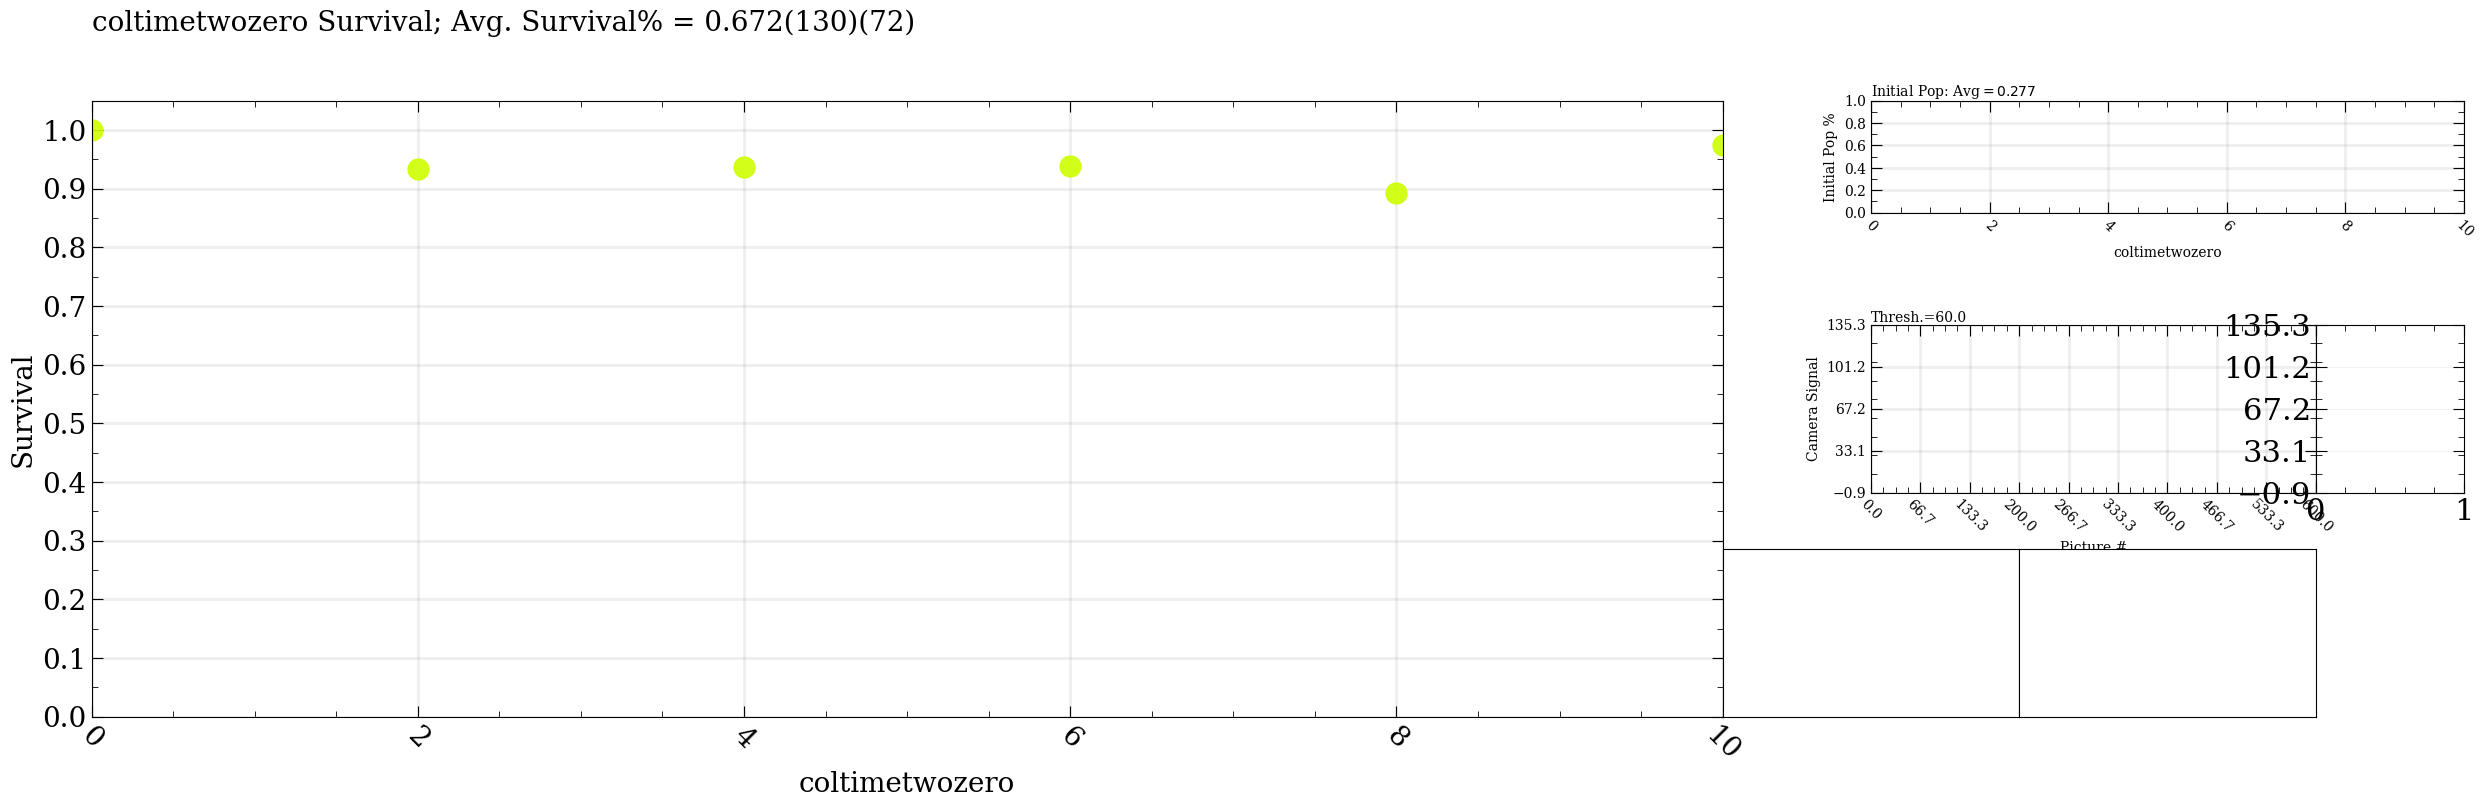

In [31]:
mp.Transfer(41, loadOpt, plotIndvHists = True, plotAvg=False, tOptions = [to.ThresholdOptions(manualThreshold = True, manualThresholdValue = 60)]);

## Temp prep

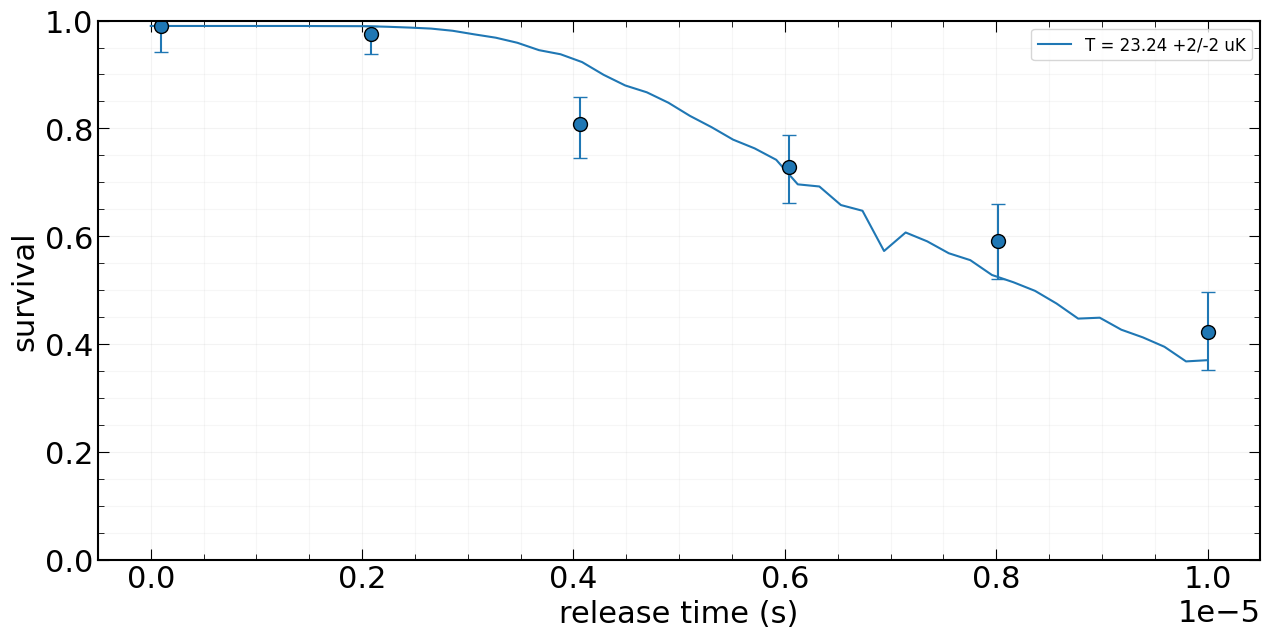

In [48]:
fileId1 = 23
# fileId2 = 1 
threshold = 75
x_data1,load_one_y1,load_one_err1,load_two_y1,load_two_err1,surv_unc1 = ta.getCollisionalData(fileId1, loadOneOpt,loadTwoOpt,threshold=threshold);
# x_data2,load_one_y2,load_one_err2,load_two_y2,load_two_err2,surv_unc2 = ta.getCollisionalData(fileId2, loadOneOpt,loadTwoOpt,threshold=threshold);
temp_guess1 = 15e-6
temp_guess2 = 30e-6
trap_depth = .75e-3
load_one_y1[0]=.99
# load_one_y1[3]=.4
# load_one_y1[4]=.2
# load_one_y2[0]=.95
# load_one_y2[1]=.85
fig,ax = plt.subplots(1, figsize=[15,7])

ax.errorbar(x_data1*1e-3,load_one_y1, yerr=load_one_err1,ls='none',ecolor=color1,marker = 'o',
            markersize = markersize,markerfacecolor=color1,markeredgecolor='k',capsize=capsize)

ah.releaseRecaptureTemp(x_data1,load_one_y1,load_one_err1,tempGuess=temp_guess1,
                        trapDepth=trap_depth,rrange=(1e-6,200e-6,0.2e-6),color=color1,last_index=5)

# ax.errorbar(x_data2*1e-3,load_one_y2, yerr=load_one_err2,ls='none',ecolor=color2,marker = 'o',markersize = markersize,
#             markerfacecolor=color2,markeredgecolor='k',capsize=capsize,label = 'after 10 ms pulse')

# ah.releaseRecaptureTemp(x_data2,load_one_y2,load_one_err2,tempGuess=temp_guess2,
#                         trapDepth=trap_depth,rrange=(1e-6,200e-6,0.2e-6),color=color2)

ax.grid(which='minor', alpha=.1)
plt.legend(loc=1, ncol = 1,prop={'size': 12})
plt.ylim(0,1)
plt.ylabel('survival')
plt.xlabel('release time (s)')
plt.rcParams["axes.linewidth"] = 1.5

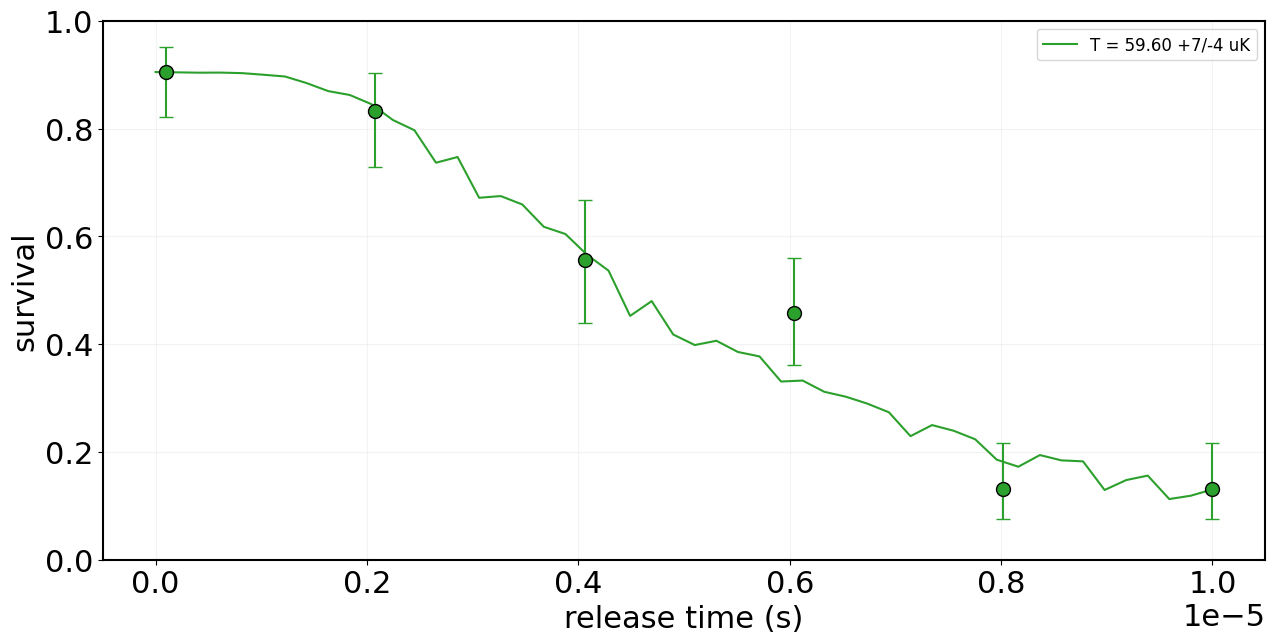

In [48]:
fileId1 = 20
# fileId2 = 1 
threshold = 75
x_data1,load_one_y1,load_one_err1,load_two_y1,load_two_err1,surv_unc1 = ta.getCollisionalData(fileId1, loadOneOpt,loadTwoOpt,threshold=threshold);
# x_data2,load_one_y2,load_one_err2,load_two_y2,load_two_err2,surv_unc2 = ta.getCollisionalData(fileId2, loadOneOpt,loadTwoOpt,threshold=threshold);
temp_guess1 = 15e-6
temp_guess2 = 30e-6
trap_depth = .75e-3
# load_one_y1[0]=.99
# load_one_y1[3]=.4
# load_one_y1[4]=.2
# load_one_y2[0]=.95
# load_one_y2[1]=.85
fig,ax = plt.subplots(1, figsize=[15,7])

ax.errorbar(x_data1*1e-3,load_one_y1, yerr=load_one_err1,ls='none',ecolor=color1,marker = 'o',
            markersize = markersize,markerfacecolor=color1,markeredgecolor='k',capsize=capsize)

ah.releaseRecaptureTemp(x_data1,load_one_y1,load_one_err1,tempGuess=temp_guess1,
                        trapDepth=trap_depth,rrange=(1e-6,200e-6,0.2e-6),color=color1,last_index=5)

# ax.errorbar(x_data2*1e-3,load_one_y2, yerr=load_one_err2,ls='none',ecolor=color2,marker = 'o',markersize = markersize,
#             markerfacecolor=color2,markeredgecolor='k',capsize=capsize,label = 'after 10 ms pulse')

# ah.releaseRecaptureTemp(x_data2,load_one_y2,load_one_err2,tempGuess=temp_guess2,
#                         trapDepth=trap_depth,rrange=(1e-6,200e-6,0.2e-6),color=color2)

ax.grid(which='minor', alpha=.1)
plt.legend(loc=1, ncol = 1,prop={'size': 12})
plt.ylim(0,1)
plt.ylabel('survival')
plt.xlabel('release time (s)')
plt.rcParams["axes.linewidth"] = 1.5

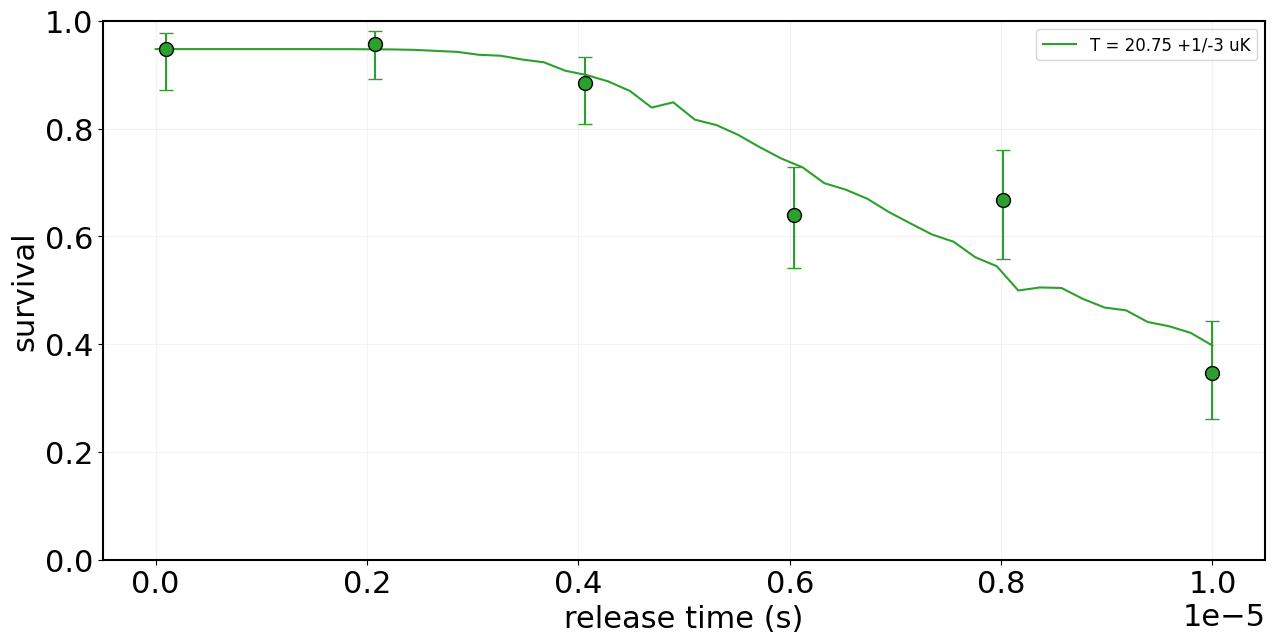

In [52]:
fileId1 = 24
# fileId2 = 1 
threshold = 75
x_data1,load_one_y1,load_one_err1,load_two_y1,load_two_err1,surv_unc1 = ta.getCollisionalData(fileId1, loadOneOpt,loadTwoOpt,threshold=threshold);
# x_data2,load_one_y2,load_one_err2,load_two_y2,load_two_err2,surv_unc2 = ta.getCollisionalData(fileId2, loadOneOpt,loadTwoOpt,threshold=threshold);
temp_guess1 = 15e-6
temp_guess2 = 30e-6
trap_depth = .75e-3
# load_one_y1[0]=.99
# load_one_y1[3]=.4
# load_one_y1[4]=.2
# load_one_y2[0]=.95
# load_one_y2[1]=.85
fig,ax = plt.subplots(1, figsize=[15,7])

ax.errorbar(x_data1*1e-3,load_one_y1, yerr=load_one_err1,ls='none',ecolor=color1,marker = 'o',
            markersize = markersize,markerfacecolor=color1,markeredgecolor='k',capsize=capsize)

ah.releaseRecaptureTemp(x_data1,load_one_y1,load_one_err1,tempGuess=temp_guess1,
                        trapDepth=trap_depth,rrange=(1e-6,200e-6,0.2e-6),color=color1,last_index=5)

# ax.errorbar(x_data2*1e-3,load_one_y2, yerr=load_one_err2,ls='none',ecolor=color2,marker = 'o',markersize = markersize,
#             markerfacecolor=color2,markeredgecolor='k',capsize=capsize,label = 'after 10 ms pulse')

# ah.releaseRecaptureTemp(x_data2,load_one_y2,load_one_err2,tempGuess=temp_guess2,
#                         trapDepth=trap_depth,rrange=(1e-6,200e-6,0.2e-6),color=color2)

ax.grid(which='minor', alpha=.1)
plt.legend(loc=1, ncol = 1,prop={'size': 12})
plt.ylim(0,1)
plt.ylabel('survival')
plt.xlabel('release time (s)')
plt.rcParams["axes.linewidth"] = 1.5

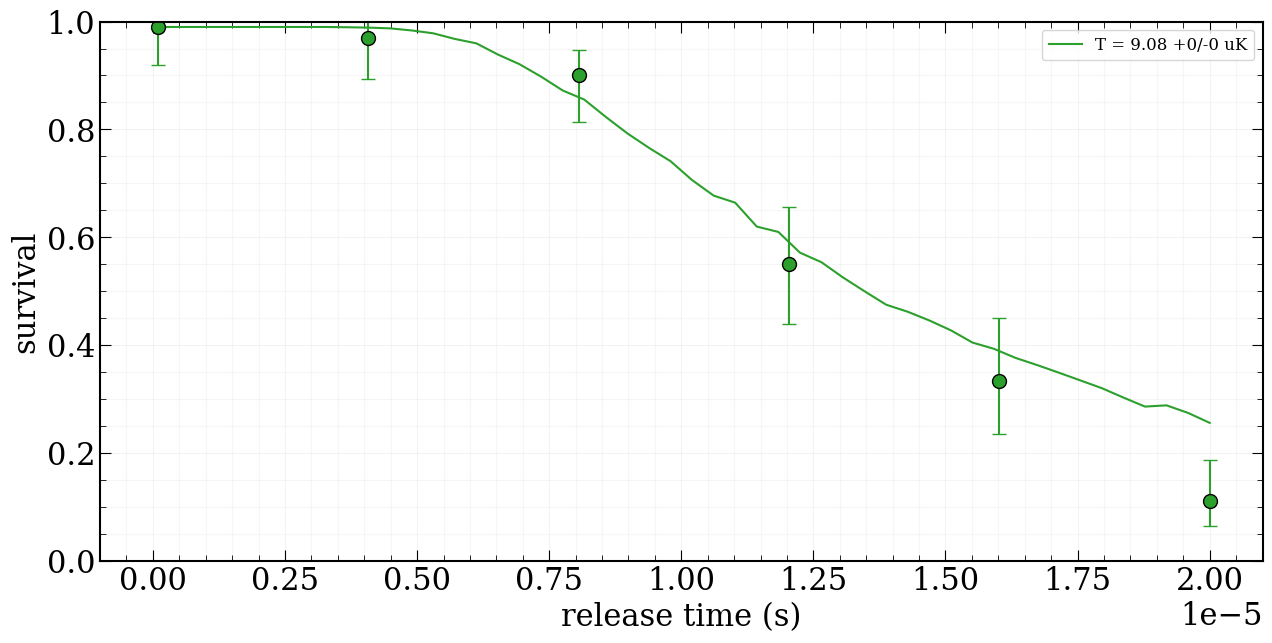

In [25]:
fileId1 = 14
# fileId2 = 1 
threshold = 75
x_data1,load_one_y1,load_one_err1,load_two_y1,load_two_err1,surv_unc1 = ta.getCollisionalData(fileId1, loadOneOpt,loadTwoOpt,threshold=threshold);
# x_data2,load_one_y2,load_one_err2,load_two_y2,load_two_err2,surv_unc2 = ta.getCollisionalData(fileId2, loadOneOpt,loadTwoOpt,threshold=threshold);
temp_guess1 = 15e-6
temp_guess2 = 30e-6
trap_depth = .75e-3
load_one_y1[0]=.99
load_one_y1[1]=.97

fig,ax = plt.subplots(1, figsize=[15,7])

ax.errorbar(x_data1*1e-3,load_one_y1, yerr=load_one_err1,ls='none',ecolor=color1,marker = 'o',
            markersize = markersize,markerfacecolor=color1,markeredgecolor='k',capsize=capsize)

ah.releaseRecaptureTemp(x_data1,load_one_y1,load_one_err1,tempGuess=temp_guess1,
                        trapDepth=trap_depth,rrange=(1e-6,200e-6,0.2e-6),color=color1,last_index=5)

# ax.errorbar(x_data2*1e-3,load_one_y2, yerr=load_one_err2,ls='none',ecolor=color2,marker = 'o',markersize = markersize,
#             markerfacecolor=color2,markeredgecolor='k',capsize=capsize,label = 'after 10 ms pulse')

# ah.releaseRecaptureTemp(x_data2,load_one_y2,load_one_err2,tempGuess=temp_guess2,
#                         trapDepth=trap_depth,rrange=(1e-6,200e-6,0.2e-6),color=color2)

ax.grid(which='minor', alpha=.1)
plt.legend(loc=1, ncol = 1,prop={'size': 12})
plt.ylim(0,1)
plt.ylabel('survival')
plt.xlabel('release time (s)')
plt.rcParams["axes.linewidth"] = 1.5

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


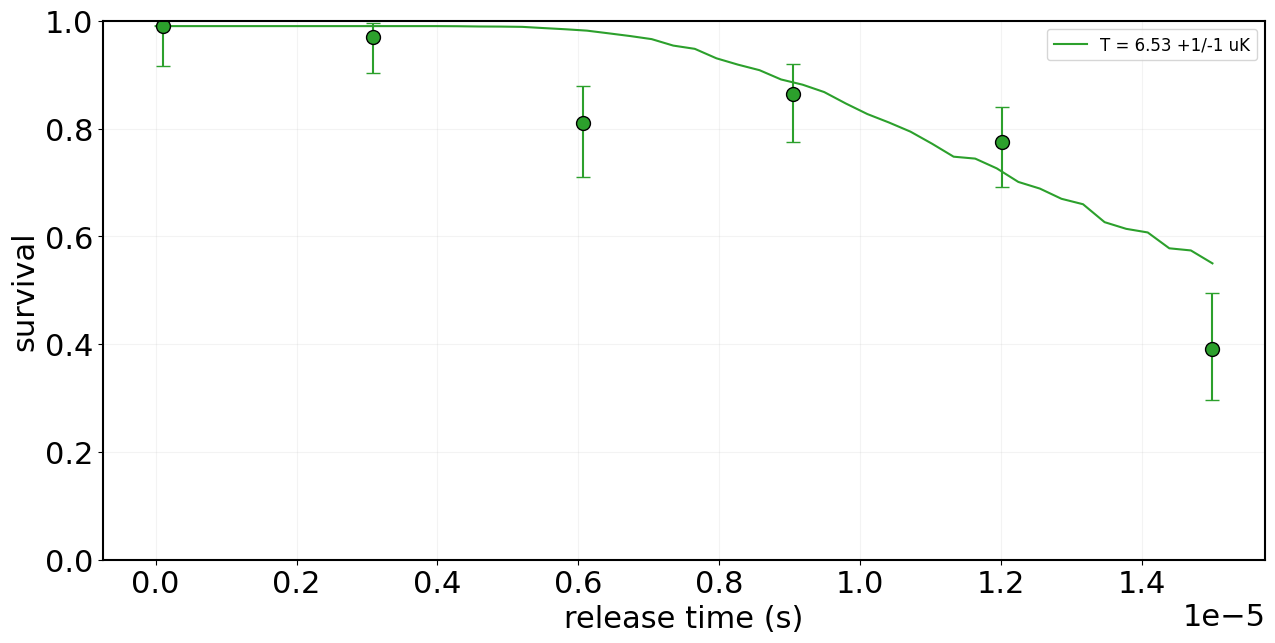

In [96]:
fileId1 = 45
# fileId2 = 1 
threshold = 75
x_data1,load_one_y1,load_one_err1,load_two_y1,load_two_err1,surv_unc1 = ta.getCollisionalData(fileId1, loadOneOpt,loadTwoOpt,threshold=threshold);
# x_data2,load_one_y2,load_one_err2,load_two_y2,load_two_err2,surv_unc2 = ta.getCollisionalData(fileId2, loadOneOpt,loadTwoOpt,threshold=threshold);
temp_guess1 = 15e-6
temp_guess2 = 30e-6
trap_depth = .75e-3
load_one_y1[0]=.99
load_one_y1[1]=.97

fig,ax = plt.subplots(1, figsize=[15,7])

ax.errorbar(x_data1*1e-3,load_one_y1, yerr=load_one_err1,ls='none',ecolor=color1,marker = 'o',
            markersize = markersize,markerfacecolor=color1,markeredgecolor='k',capsize=capsize)

ah.releaseRecaptureTemp(x_data1,load_one_y1,load_one_err1,tempGuess=temp_guess1,
                        trapDepth=trap_depth,rrange=(1e-6,200e-6,0.2e-6),color=color1,last_index=5)

# ax.errorbar(x_data2*1e-3,load_one_y2, yerr=load_one_err2,ls='none',ecolor=color2,marker = 'o',markersize = markersize,
#             markerfacecolor=color2,markeredgecolor='k',capsize=capsize,label = 'after 10 ms pulse')

# ah.releaseRecaptureTemp(x_data2,load_one_y2,load_one_err2,tempGuess=temp_guess2,
#                         trapDepth=trap_depth,rrange=(1e-6,200e-6,0.2e-6),color=color2)

ax.grid(which='minor', alpha=.1)
plt.legend(loc=1, ncol = 1,prop={'size': 12})
plt.ylim(0,1)
plt.ylabel('survival')
plt.xlabel('release time (s)')
plt.rcParams["axes.linewidth"] = 1.5

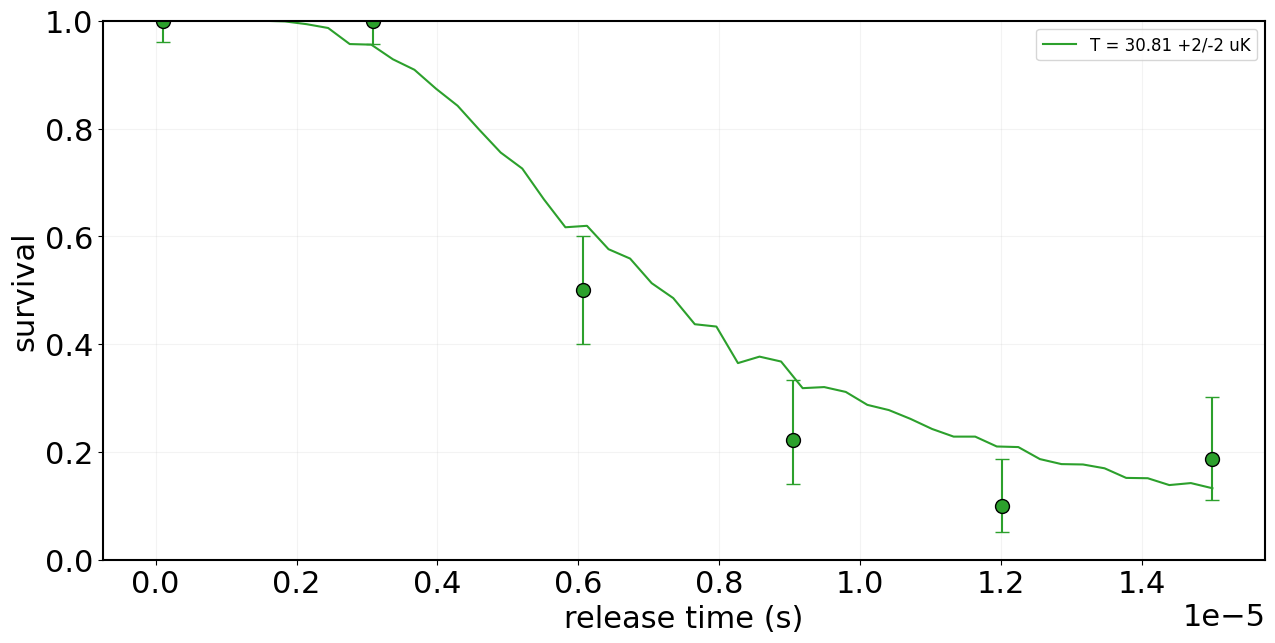

In [99]:
fileId1 = 46
# fileId2 = 1 
threshold = 75
x_data1,load_one_y1,load_one_err1,load_two_y1,load_two_err1,surv_unc1 = ta.getCollisionalData(fileId1, loadOneOpt,loadTwoOpt,threshold=threshold);
# x_data2,load_one_y2,load_one_err2,load_two_y2,load_two_err2,surv_unc2 = ta.getCollisionalData(fileId2, loadOneOpt,loadTwoOpt,threshold=threshold);
temp_guess1 = 15e-6
temp_guess2 = 30e-6
trap_depth = .75e-3
# load_one_y1[0]=.99
# load_one_y1[1]=.97

fig,ax = plt.subplots(1, figsize=[15,7])

ax.errorbar(x_data1*1e-3,load_one_y1, yerr=load_one_err1,ls='none',ecolor=color1,marker = 'o',
            markersize = markersize,markerfacecolor=color1,markeredgecolor='k',capsize=capsize)

ah.releaseRecaptureTemp(x_data1,load_one_y1,load_one_err1,tempGuess=temp_guess1,
                        trapDepth=trap_depth,rrange=(1e-6,200e-6,0.2e-6),color=color1,last_index=5)

# ax.errorbar(x_data2*1e-3,load_one_y2, yerr=load_one_err2,ls='none',ecolor=color2,marker = 'o',markersize = markersize,
#             markerfacecolor=color2,markeredgecolor='k',capsize=capsize,label = 'after 10 ms pulse')

# ah.releaseRecaptureTemp(x_data2,load_one_y2,load_one_err2,tempGuess=temp_guess2,
#                         trapDepth=trap_depth,rrange=(1e-6,200e-6,0.2e-6),color=color2)

ax.grid(which='minor', alpha=.1)
plt.legend(loc=1, ncol = 1,prop={'size': 12})
plt.ylim(0,1)
plt.ylabel('survival')
plt.xlabel('release time (s)')
plt.rcParams["axes.linewidth"] = 1.5

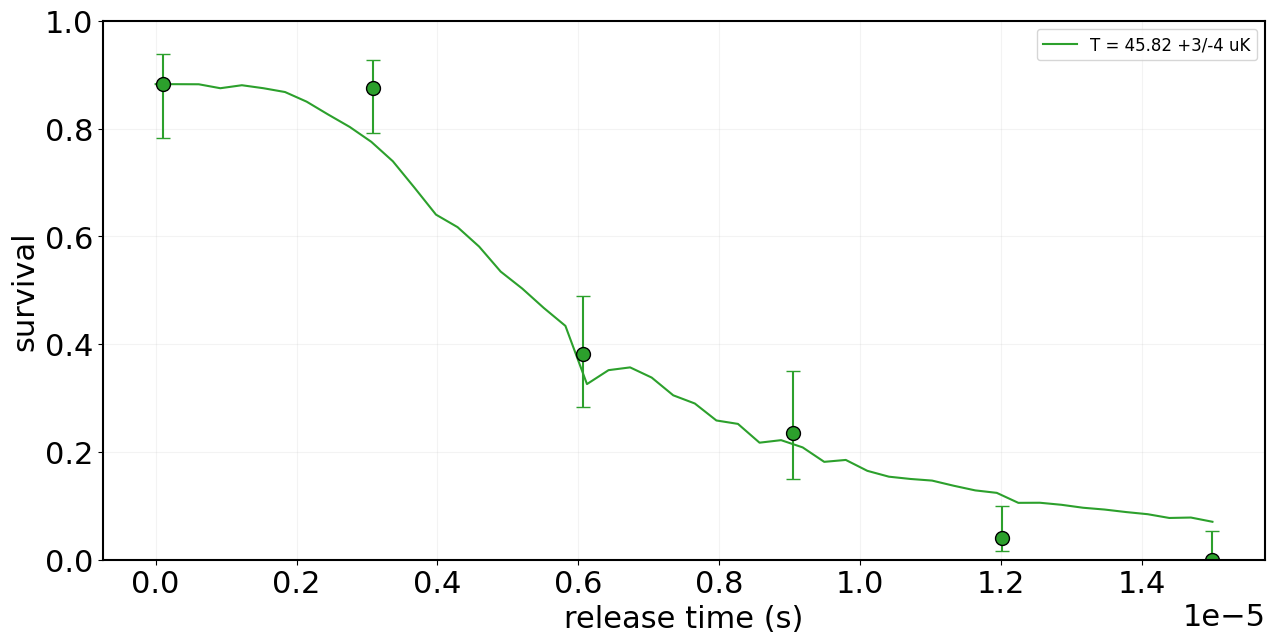

In [101]:
fileId1 = 48
# fileId2 = 1 
threshold = 75
x_data1,load_one_y1,load_one_err1,load_two_y1,load_two_err1,surv_unc1 = ta.getCollisionalData(fileId1, loadOneOpt,loadTwoOpt,threshold=threshold);
# x_data2,load_one_y2,load_one_err2,load_two_y2,load_two_err2,surv_unc2 = ta.getCollisionalData(fileId2, loadOneOpt,loadTwoOpt,threshold=threshold);
temp_guess1 = 15e-6
temp_guess2 = 30e-6
trap_depth = .75e-3
# load_one_y1[0]=.99
# load_one_y1[1]=.97

fig,ax = plt.subplots(1, figsize=[15,7])

ax.errorbar(x_data1*1e-3,load_one_y1, yerr=load_one_err1,ls='none',ecolor=color1,marker = 'o',
            markersize = markersize,markerfacecolor=color1,markeredgecolor='k',capsize=capsize)

ah.releaseRecaptureTemp(x_data1,load_one_y1,load_one_err1,tempGuess=temp_guess1,
                        trapDepth=trap_depth,rrange=(1e-6,200e-6,0.2e-6),color=color1,last_index=5)

# ax.errorbar(x_data2*1e-3,load_one_y2, yerr=load_one_err2,ls='none',ecolor=color2,marker = 'o',markersize = markersize,
#             markerfacecolor=color2,markeredgecolor='k',capsize=capsize,label = 'after 10 ms pulse')

# ah.releaseRecaptureTemp(x_data2,load_one_y2,load_one_err2,tempGuess=temp_guess2,
#                         trapDepth=trap_depth,rrange=(1e-6,200e-6,0.2e-6),color=color2)

ax.grid(which='minor', alpha=.1)
plt.legend(loc=1, ncol = 1,prop={'size': 12})
plt.ylim(0,1)
plt.ylabel('survival')
plt.xlabel('release time (s)')
plt.rcParams["axes.linewidth"] = 1.5

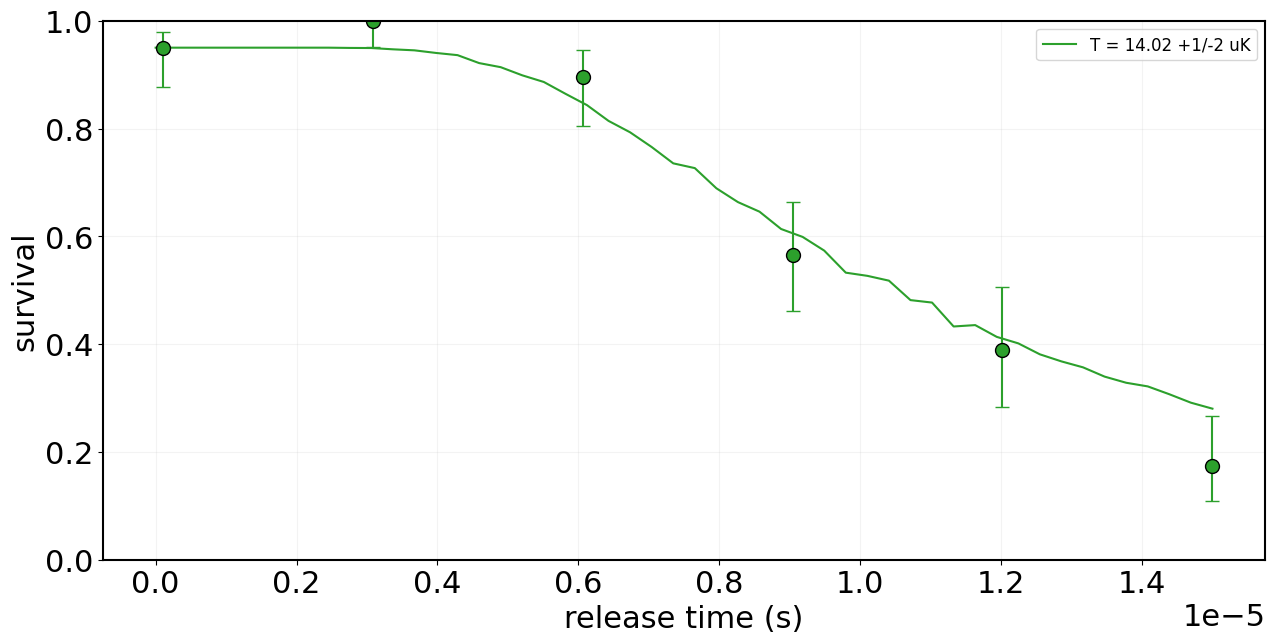

In [100]:
fileId1 = 47
# fileId2 = 1 
threshold = 75
x_data1,load_one_y1,load_one_err1,load_two_y1,load_two_err1,surv_unc1 = ta.getCollisionalData(fileId1, loadOneOpt,loadTwoOpt,threshold=threshold);
# x_data2,load_one_y2,load_one_err2,load_two_y2,load_two_err2,surv_unc2 = ta.getCollisionalData(fileId2, loadOneOpt,loadTwoOpt,threshold=threshold);
temp_guess1 = 15e-6
temp_guess2 = 30e-6
trap_depth = .75e-3
# load_one_y1[0]=.99
# load_one_y1[1]=.97

fig,ax = plt.subplots(1, figsize=[15,7])

ax.errorbar(x_data1*1e-3,load_one_y1, yerr=load_one_err1,ls='none',ecolor=color1,marker = 'o',
            markersize = markersize,markerfacecolor=color1,markeredgecolor='k',capsize=capsize)

ah.releaseRecaptureTemp(x_data1,load_one_y1,load_one_err1,tempGuess=temp_guess1,
                        trapDepth=trap_depth,rrange=(1e-6,200e-6,0.2e-6),color=color1,last_index=5)

# ax.errorbar(x_data2*1e-3,load_one_y2, yerr=load_one_err2,ls='none',ecolor=color2,marker = 'o',markersize = markersize,
#             markerfacecolor=color2,markeredgecolor='k',capsize=capsize,label = 'after 10 ms pulse')

# ah.releaseRecaptureTemp(x_data2,load_one_y2,load_one_err2,tempGuess=temp_guess2,
#                         trapDepth=trap_depth,rrange=(1e-6,200e-6,0.2e-6),color=color2)

ax.grid(which='minor', alpha=.1)
plt.legend(loc=1, ncol = 1,prop={'size': 12})
plt.ylim(0,1)
plt.ylabel('survival')
plt.xlabel('release time (s)')
plt.rcParams["axes.linewidth"] = 1.5

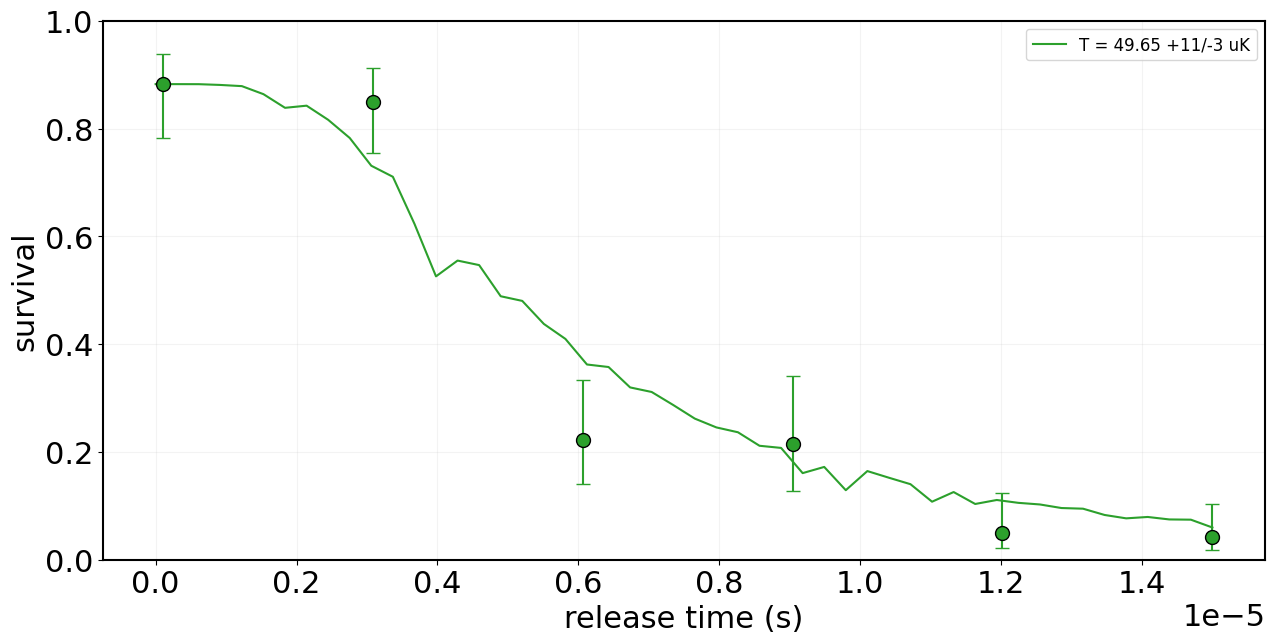

In [121]:
reloadMyModules(12)
fileId1 = 3
# fileId2 = 1 
threshold = 75
x_data1,load_one_y1,load_one_err1,load_two_y1,load_two_err1,surv_unc1 = ta.getCollisionalData(fileId1, loadOneOpt,loadTwoOpt,threshold=threshold);
# x_data2,load_one_y2,load_one_err2,load_two_y2,load_two_err2,surv_unc2 = ta.getCollisionalData(fileId2, loadOneOpt,loadTwoOpt,threshold=threshold);
temp_guess1 = 15e-6
temp_guess2 = 30e-6
trap_depth = .75e-3
# load_one_y1[0]=.99
# load_one_y1[1]=.97

fig,ax = plt.subplots(1, figsize=[15,7])

ax.errorbar(x_data1*1e-3,load_one_y1, yerr=load_one_err1,ls='none',ecolor=color1,marker = 'o',
            markersize = markersize,markerfacecolor=color1,markeredgecolor='k',capsize=capsize)

ah.releaseRecaptureTemp(x_data1,load_one_y1,load_one_err1,tempGuess=temp_guess1,
                        trapDepth=trap_depth,rrange=(1e-6,200e-6,0.2e-6),color=color1,last_index=5)

# ax.errorbar(x_data2*1e-3,load_one_y2, yerr=load_one_err2,ls='none',ecolor=color2,marker = 'o',markersize = markersize,
#             markerfacecolor=color2,markeredgecolor='k',capsize=capsize,label = 'after 10 ms pulse')

# ah.releaseRecaptureTemp(x_data2,load_one_y2,load_one_err2,tempGuess=temp_guess2,
#                         trapDepth=trap_depth,rrange=(1e-6,200e-6,0.2e-6),color=color2)

ax.grid(which='minor', alpha=.1)
plt.legend(loc=1, ncol = 1,prop={'size': 12})
plt.ylim(0,1)
plt.ylabel('survival')
plt.xlabel('release time (s)')
plt.rcParams["axes.linewidth"] = 1.5

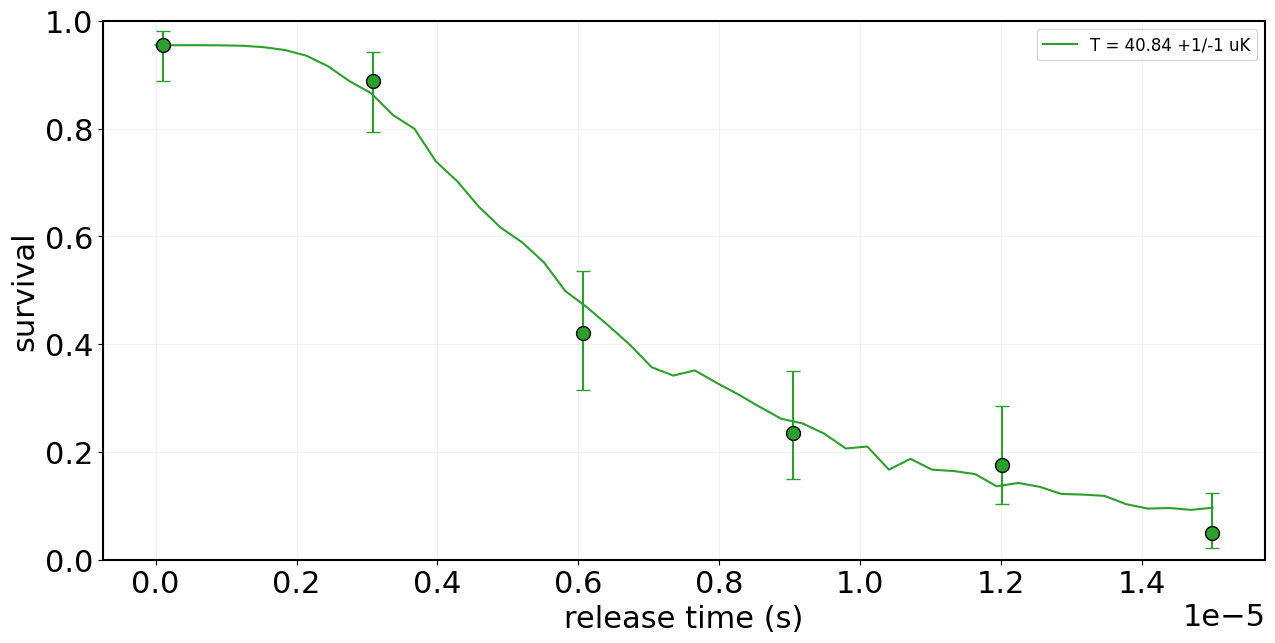

In [124]:
reloadMyModules(12)
fileId1 = 5
# fileId2 = 1 
threshold = 75
x_data1,load_one_y1,load_one_err1,load_two_y1,load_two_err1,surv_unc1 = ta.getCollisionalData(fileId1, loadOneOpt,loadTwoOpt,threshold=threshold);
# x_data2,load_one_y2,load_one_err2,load_two_y2,load_two_err2,surv_unc2 = ta.getCollisionalData(fileId2, loadOneOpt,loadTwoOpt,threshold=threshold);
temp_guess1 = 15e-6
temp_guess2 = 30e-6
trap_depth = .75e-3
# load_one_y1[0]=.99
# load_one_y1[1]=.97

fig,ax = plt.subplots(1, figsize=[15,7])

ax.errorbar(x_data1*1e-3,load_one_y1, yerr=load_one_err1,ls='none',ecolor=color1,marker = 'o',
            markersize = markersize,markerfacecolor=color1,markeredgecolor='k',capsize=capsize)

ah.releaseRecaptureTemp(x_data1,load_one_y1,load_one_err1,tempGuess=temp_guess1,
                        trapDepth=trap_depth,rrange=(1e-6,200e-6,0.2e-6),color=color1,last_index=5)

# ax.errorbar(x_data2*1e-3,load_one_y2, yerr=load_one_err2,ls='none',ecolor=color2,marker = 'o',markersize = markersize,
#             markerfacecolor=color2,markeredgecolor='k',capsize=capsize,label = 'after 10 ms pulse')

# ah.releaseRecaptureTemp(x_data2,load_one_y2,load_one_err2,tempGuess=temp_guess2,
#                         trapDepth=trap_depth,rrange=(1e-6,200e-6,0.2e-6),color=color2)

ax.grid(which='minor', alpha=.1)
plt.legend(loc=1, ncol = 1,prop={'size': 12})
plt.ylim(0,1)
plt.ylabel('survival')
plt.xlabel('release time (s)')
plt.rcParams["axes.linewidth"] = 1.5

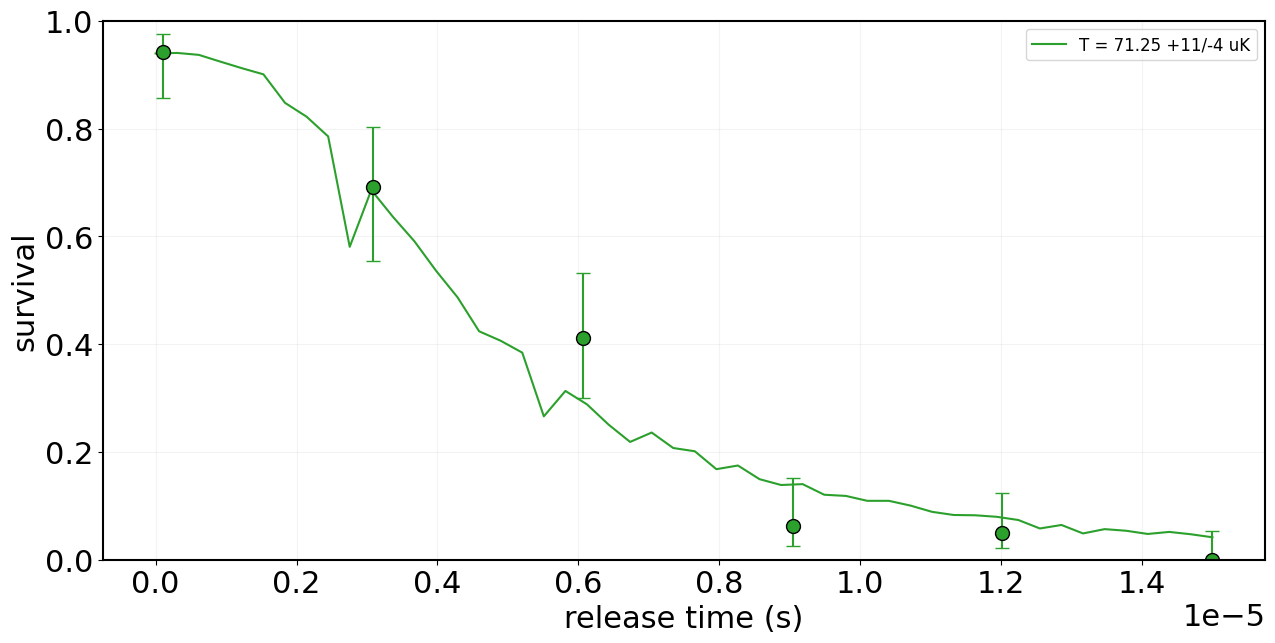

In [125]:
reloadMyModules(12)
fileId1 = 6
# fileId2 = 1 
threshold = 75
x_data1,load_one_y1,load_one_err1,load_two_y1,load_two_err1,surv_unc1 = ta.getCollisionalData(fileId1, loadOneOpt,loadTwoOpt,threshold=threshold);
# x_data2,load_one_y2,load_one_err2,load_two_y2,load_two_err2,surv_unc2 = ta.getCollisionalData(fileId2, loadOneOpt,loadTwoOpt,threshold=threshold);
temp_guess1 = 15e-6
temp_guess2 = 30e-6
trap_depth = .75e-3
# load_one_y1[0]=.99
# load_one_y1[1]=.97

fig,ax = plt.subplots(1, figsize=[15,7])

ax.errorbar(x_data1*1e-3,load_one_y1, yerr=load_one_err1,ls='none',ecolor=color1,marker = 'o',
            markersize = markersize,markerfacecolor=color1,markeredgecolor='k',capsize=capsize)

ah.releaseRecaptureTemp(x_data1,load_one_y1,load_one_err1,tempGuess=temp_guess1,
                        trapDepth=trap_depth,rrange=(1e-6,200e-6,0.2e-6),color=color1,last_index=5)

# ax.errorbar(x_data2*1e-3,load_one_y2, yerr=load_one_err2,ls='none',ecolor=color2,marker = 'o',markersize = markersize,
#             markerfacecolor=color2,markeredgecolor='k',capsize=capsize,label = 'after 10 ms pulse')

# ah.releaseRecaptureTemp(x_data2,load_one_y2,load_one_err2,tempGuess=temp_guess2,
#                         trapDepth=trap_depth,rrange=(1e-6,200e-6,0.2e-6),color=color2)

ax.grid(which='minor', alpha=.1)
plt.legend(loc=1, ncol = 1,prop={'size': 12})
plt.ylim(0,1)
plt.ylabel('survival')
plt.xlabel('release time (s)')
plt.rcParams["axes.linewidth"] = 1.5

### 30 $\mu$K (no in-trap PGC)

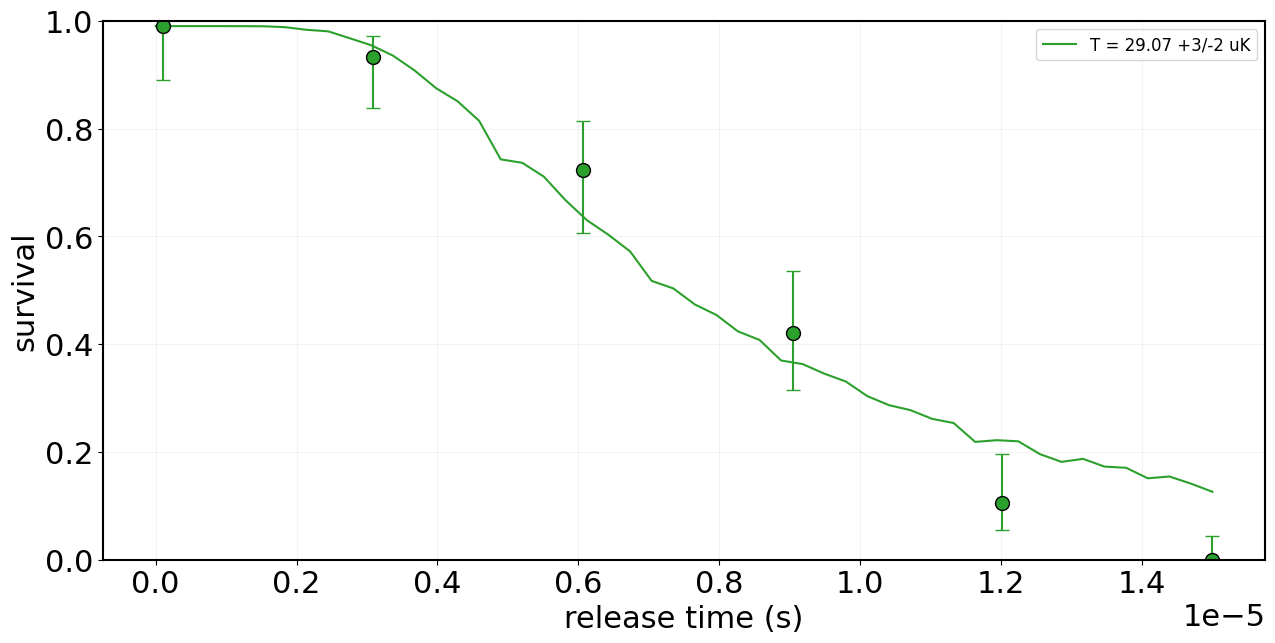

In [127]:
reloadMyModules(12)
fileId1 = 4
# fileId2 = 1 
threshold = 75
x_data1,load_one_y1,load_one_err1,load_two_y1,load_two_err1,surv_unc1 = ta.getCollisionalData(fileId1, loadOneOpt,loadTwoOpt,threshold=threshold);
# x_data2,load_one_y2,load_one_err2,load_two_y2,load_two_err2,surv_unc2 = ta.getCollisionalData(fileId2, loadOneOpt,loadTwoOpt,threshold=threshold);
temp_guess1 = 15e-6
temp_guess2 = 30e-6
trap_depth = .75e-3
load_one_y1[0]=.99
# load_one_y1[1]=.97

fig,ax = plt.subplots(1, figsize=[15,7])

ax.errorbar(x_data1*1e-3,load_one_y1, yerr=load_one_err1,ls='none',ecolor=color1,marker = 'o',
            markersize = markersize,markerfacecolor=color1,markeredgecolor='k',capsize=capsize)

ah.releaseRecaptureTemp(x_data1,load_one_y1,load_one_err1,tempGuess=temp_guess1,
                        trapDepth=trap_depth,rrange=(1e-6,200e-6,0.2e-6),color=color1,last_index=5)

# ax.errorbar(x_data2*1e-3,load_one_y2, yerr=load_one_err2,ls='none',ecolor=color2,marker = 'o',markersize = markersize,
#             markerfacecolor=color2,markeredgecolor='k',capsize=capsize,label = 'after 10 ms pulse')

# ah.releaseRecaptureTemp(x_data2,load_one_y2,load_one_err2,tempGuess=temp_guess2,
#                         trapDepth=trap_depth,rrange=(1e-6,200e-6,0.2e-6),color=color2)

ax.grid(which='minor', alpha=.1)
plt.legend(loc=1, ncol = 1,prop={'size': 12})
plt.ylim(0,1)
plt.ylabel('survival')
plt.xlabel('release time (s)')
plt.rcParams["axes.linewidth"] = 1.5

### 55 $\mu$K 1 ms modulation at 250 kHz V=0.5

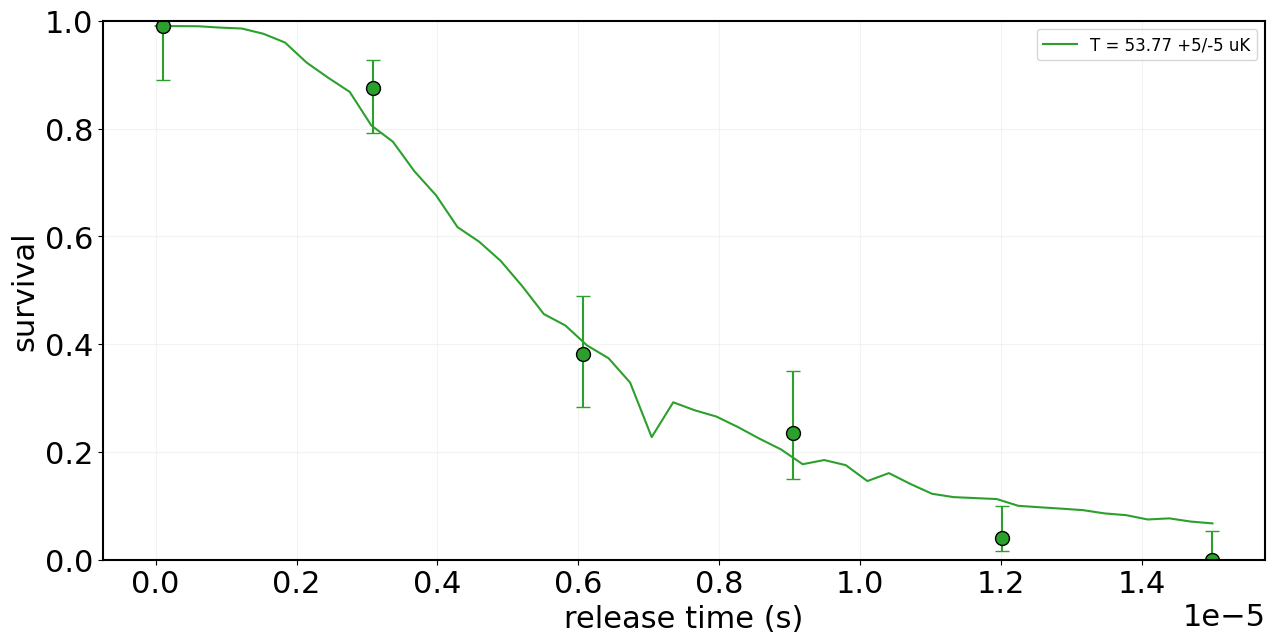

In [227]:
reloadMyModules(11)
fileId1 = 48
# fileId2 = 1 
threshold = 75
x_data1,load_one_y1,load_one_err1,load_two_y1,load_two_err1,surv_unc1 = ta.getCollisionalData(fileId1, loadOneOpt,loadTwoOpt,threshold=threshold);
# x_data2,load_one_y2,load_one_err2,load_two_y2,load_two_err2,surv_unc2 = ta.getCollisionalData(fileId2, loadOneOpt,loadTwoOpt,threshold=threshold);
temp_guess1 = 15e-6
temp_guess2 = 30e-6
trap_depth = .75e-3
load_one_y1[0]=.99
# load_one_y1[1]=.97

fig,ax = plt.subplots(1, figsize=[15,7])

ax.errorbar(x_data1*1e-3,load_one_y1, yerr=load_one_err1,ls='none',ecolor=color1,marker = 'o',
            markersize = markersize,markerfacecolor=color1,markeredgecolor='k',capsize=capsize)

ah.releaseRecaptureTemp(x_data1,load_one_y1,load_one_err1,tempGuess=temp_guess1,
                        trapDepth=trap_depth,rrange=(1e-6,200e-6,0.2e-6),color=color1,last_index=5)

# ax.errorbar(x_data2*1e-3,load_one_y2, yerr=load_one_err2,ls='none',ecolor=color2,marker = 'o',markersize = markersize,
#             markerfacecolor=color2,markeredgecolor='k',capsize=capsize,label = 'after 10 ms pulse')

# ah.releaseRecaptureTemp(x_data2,load_one_y2,load_one_err2,tempGuess=temp_guess2,
#                         trapDepth=trap_depth,rrange=(1e-6,200e-6,0.2e-6),color=color2)

ax.grid(which='minor', alpha=.1)
plt.legend(loc=1, ncol = 1,prop={'size': 12})
plt.ylim(0,1)
plt.ylabel('survival')
plt.xlabel('release time (s)')
plt.rcParams["axes.linewidth"] = 1.5

# Blue of D1  F=2-2' $T_0$ data: all in $\pi$ polarization (non-retro) with U/h = 10 MHz   $\ \ \ \ \   I=1.3 I_{sat}$

All detunings with respect to free space resonance

## $\Delta = 150 $ MHz

In [72]:
color1 = 'tab:green'
color2 = 'tab:blue'

### 30 $\mu$K

beta = 2.8137818199701384e-11 +/- 4.674905153913545e-12


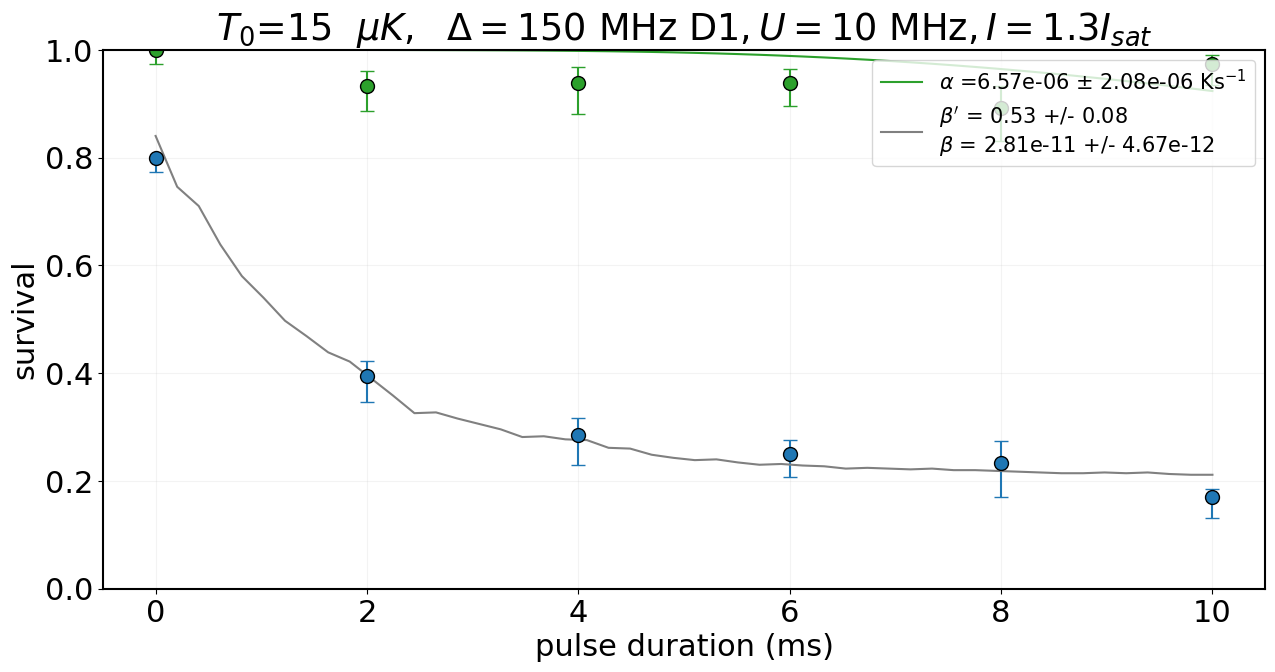

In [ ]:
reloadMyModules(11)
fileId = 41
threshold = 60
x_data,load_one_y,load_one_err,load_two_y,load_two_err,surv_unc = ta.getCollisionalData(fileId, loadOneOpt,loadTwoOpt,threshold=threshold);
load_two_y[0] = 0.8
load_two_y[5] = 0.17

# load_two_y[4] = 0.3

T0 = 18e-6
T0_unc = 1e-6
num_points = 50
alpha_guess = 1e-6
uncertainties = [surv_unc]*num_points 
alpha, decay_constant = lac.beta_fit_guess(x_data,load_one_y,load_two_y, U0, T0,alpha_guess=alpha_guess,num_points = num_points,plot_alpha=False,plot_tau=False)
_,x_fit,y_fit,decay_unc = lac.decay_fit(x_data,load_two_y,num_points = num_points,plot=False)

fig,ax = plt.subplots(1, figsize=[15,7])
beta_prime = decay_constant
total_unc = decay_unc
# beta_prime,high_err,low_err = lac.beta_prime_fit(decay_constant,alpha,uncertainties,x_fit,y_fit,range_lim=.4,range_step=0.001)
# total_unc = np.sqrt(((high_err+low_err)/2)**2 + decay_unc**2) 
ax.errorbar(x_data,load_two_y, yerr=load_two_err,ls='none',ecolor=color2,marker = 'o',markersize = markersize,
            markerfacecolor=color2,markeredgecolor='k',capsize=capsize)


ax.errorbar(x_data,load_one_y, yerr=load_one_err,ls='none',ecolor=color1,marker = 'o',markersize = markersize,
            markerfacecolor=color1,markeredgecolor='k',capsize=capsize)
alpha, decay_constant = lac.beta_fit_guess(x_data,load_one_y,load_two_y, U0, T0,alpha_guess=alpha_guess,num_points = num_points,plot_tau=False)
ticks = np.arange(x_data[0], max(x_data),len(x_data))

plt.title(r'$T_0$=15  $  \mu K , \ \ \Delta = 150 \ \mathrm{MHz} \ \mathrm{D1}, U=10 \ \mathrm{MHz}, I=1.3I_{sat} $');
decay_constant_15uK = decay_constant
beta_15uK_LGM,beta_15uK_LGM_unc = lac.betaCalc(beta_prime,total_unc,w,w_unc,T0,T0_unc)
ax.plot(x_fit, lac.two_body_loss_sim(x_fit,beta_prime,alpha,asymp=0.2), 
        label= f"$\\beta^{{\\prime}}$ = {beta_prime:.2f} +/- {total_unc:.2f}\n$\\beta$ = {beta_15uK_LGM:.2e} +/- {beta_15uK_LGM_unc:.2e}", color='grey')
plt.legend(loc= 'upper right', ncol = 1,prop={'size': 15})
plt.ylim(0,1)
plt.ylabel('survival')
plt.xlabel(r'pulse duration (ms)')
print('beta =',beta_15uK_LGM,'+/-',beta_15uK_LGM_unc)

beta = 3.559382280550596e-11 +/- 5.847355747564636e-12


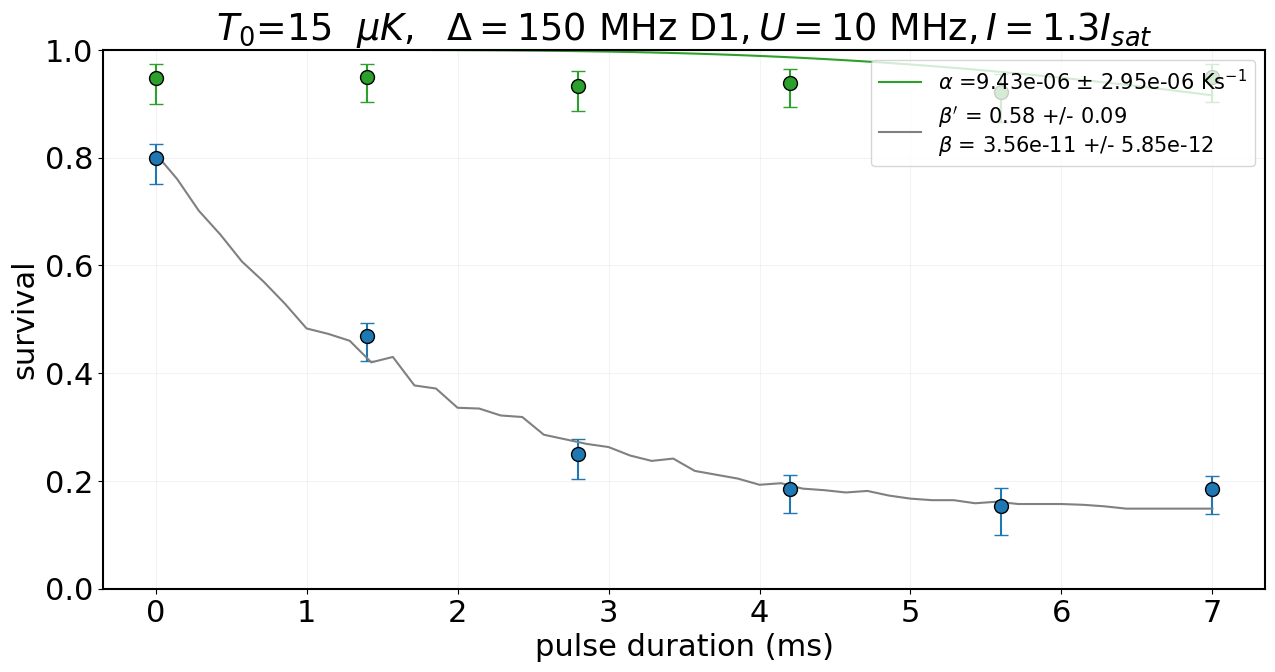

In [ ]:
fileId = 42
threshold = 60
x_data,load_one_y,load_one_err,load_two_y,load_two_err,surv_unc = ta.getCollisionalData(fileId, loadOneOpt,loadTwoOpt,threshold=threshold);
load_two_y[0] = 0.8
load_two_y[2] = 0.25

# load_two_y[4] = 0.3

T0 = 20e-6
T0_unc = 1e-6
num_points = 50
alpha_guess = 1e-6
uncertainties = [surv_unc]*num_points 
alpha, decay_constant = lac.beta_fit_guess(x_data,load_one_y,load_two_y, U0, T0,alpha_guess=alpha_guess,num_points = num_points,plot_alpha=False,plot_tau=False)
_,x_fit,y_fit,decay_unc = lac.decay_fit(x_data,load_two_y,num_points = num_points,plot=False)

fig,ax = plt.subplots(1, figsize=[15,7])
beta_prime = decay_constant
total_unc = decay_unc
# beta_prime,high_err,low_err = lac.beta_prime_fit(decay_constant,alpha,uncertainties,x_fit,y_fit,range_lim=.4,range_step=0.001)
# total_unc = np.sqrt(((high_err+low_err)/2)**2 + decay_unc**2) 

ax.errorbar(x_data,load_two_y, yerr=load_two_err,ls='none',ecolor=color2,marker = 'o',markersize = markersize,
            markerfacecolor=color2,markeredgecolor='k',capsize=capsize)


ax.errorbar(x_data,load_one_y, yerr=load_one_err,ls='none',ecolor=color1,marker = 'o',markersize = markersize,
            markerfacecolor=color1,markeredgecolor='k',capsize=capsize)
alpha, decay_constant = lac.beta_fit_guess(x_data,load_one_y,load_two_y, U0, T0,alpha_guess=alpha_guess,num_points = num_points,plot_tau=False)
ticks = np.arange(x_data[0], max(x_data),len(x_data))

plt.title(r'$T_0$=15  $  \mu K , \ \ \Delta = 150 \ \mathrm{MHz} \ \mathrm{D1}, U=10 \ \mathrm{MHz}, I=1.3I_{sat} $');
decay_constant_15uK = decay_constant
beta_15uK_LGM,beta_15uK_LGM_unc = lac.betaCalc(beta_prime,total_unc,w,w_unc,T0,T0_unc)
ax.plot(x_fit, lac.two_body_loss_sim(x_fit,beta_prime,alpha,asymp=0.15), 
        label= f"$\\beta^{{\\prime}}$ = {beta_prime:.2f} +/- {total_unc:.2f}\n$\\beta$ = {beta_15uK_LGM:.2e} +/- {beta_15uK_LGM_unc:.2e}", color='grey')
plt.legend(loc= 'upper right', ncol = 1,prop={'size': 15})
plt.ylim(0,1)
plt.ylabel('survival')
plt.xlabel(r'pulse duration (ms)')
print('beta =',beta_15uK_LGM,'+/-',beta_15uK_LGM_unc)

beta = 5.491863948862333e-11 +/- 1.245436963665821e-11


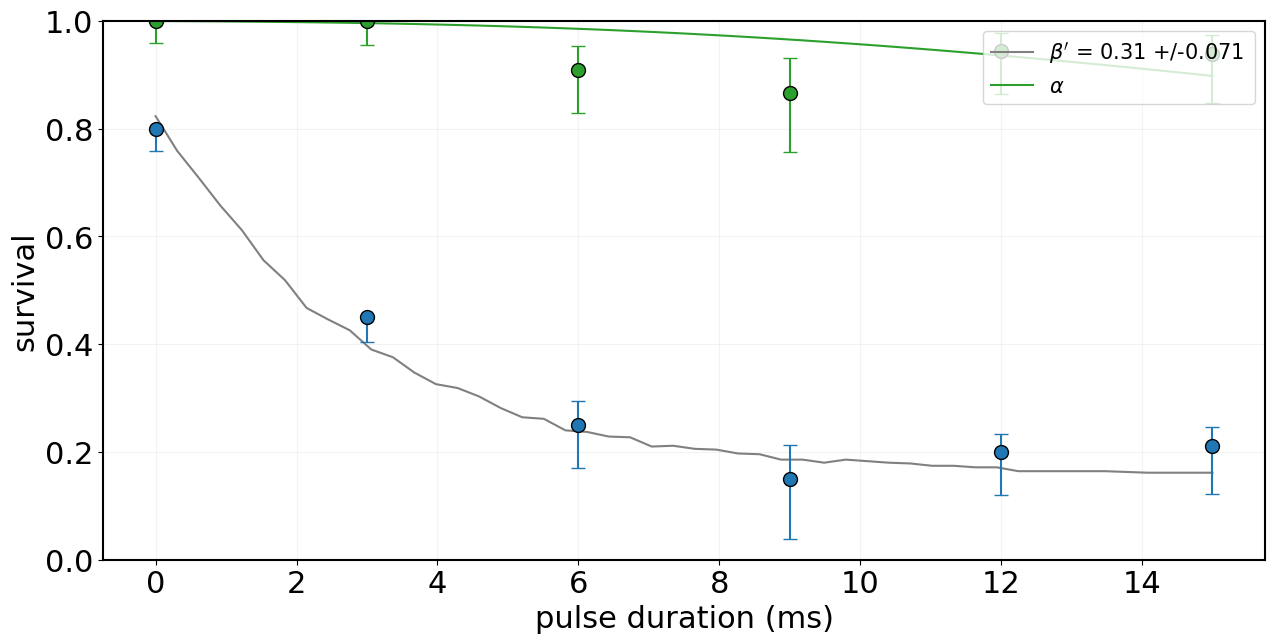

In [118]:
reloadMyModules(12)
fileId = 1
threshold = 60
x_data,load_one_y,load_one_err,load_two_y,load_two_err,surv_unc = ta.getCollisionalData(fileId, loadOneOpt,loadTwoOpt,threshold=threshold);
load_two_y[0] = 0.8
load_two_y[1] = 0.45

# load_two_y[4] = 0.3

T0 = 40e-6
T0_unc = 1e-6
num_points = 50
alpha_guess = 1e-6
uncertainties = [surv_unc]*num_points 
alpha, decay_constant = lac.beta_fit_guess(x_data,load_one_y,load_two_y, U0, T0,alpha_guess=alpha_guess,num_points = num_points,plot_alpha=False,plot_tau=False)
_,x_fit,y_fit,decay_unc = lac.decay_fit(x_data,load_two_y,num_points = num_points,plot=False)

fig,ax = plt.subplots(1, figsize=[15,7])
beta_prime = decay_constant
total_unc = decay_unc
# beta_prime,high_err,low_err = lac.beta_prime_fit(decay_constant,alpha,uncertainties,x_fit,y_fit,range_lim=.4,range_step=0.001)
# total_unc = np.sqrt(((high_err+low_err)/2)**2 + decay_unc**2) 
ax.plot(x_fit, lac.two_body_loss_sim(x_fit,beta_prime,alpha,asymp=0.15), 
        label= f"$\\beta^{{\\prime}}$ = {beta_prime:.2f} +/-{total_unc:.3f} ",color='grey')

ax.errorbar(x_data,load_two_y, yerr=load_two_err,ls='none',ecolor=color2,marker = 'o',markersize = markersize,
            markerfacecolor=color2,markeredgecolor='k',capsize=capsize)


ax.errorbar(x_data,load_one_y, yerr=load_one_err,ls='none',ecolor=color1,marker = 'o',markersize = markersize,
            markerfacecolor=color1,markeredgecolor='k',capsize=capsize)
alpha, decay_constant = lac.beta_fit_guess(x_data,load_one_y,load_two_y, U0, T0,alpha_guess=alpha_guess,num_points = num_points,plot_tau=False)
ticks = np.arange(x_data[0], max(x_data),len(x_data))
plt.legend(loc= 'upper right', ncol = 1,prop={'size': 15})
plt.ylim(0,1)
plt.ylabel('survival')
plt.xlabel(r'pulse duration (ms)')
# plt.title(r'LGM  T=15  $  \mu K  \ \ \Delta = 150 \ \mathrm{MHz} \ \mathrm{D1}, U=10 \ \mathrm{MHz}, I=1.3I_{sat} $');
decay_constant_15uK = decay_constant
beta_15uK_LGM,beta_15uK_LGM_unc = lac.betaCalc(beta_prime,total_unc,w,w_unc,T0,T0_unc)
print('beta =',beta_15uK_LGM,'+/-',beta_15uK_LGM_unc)

beta = 4.537956353883476e-11 +/- 1.5213485786461607e-11


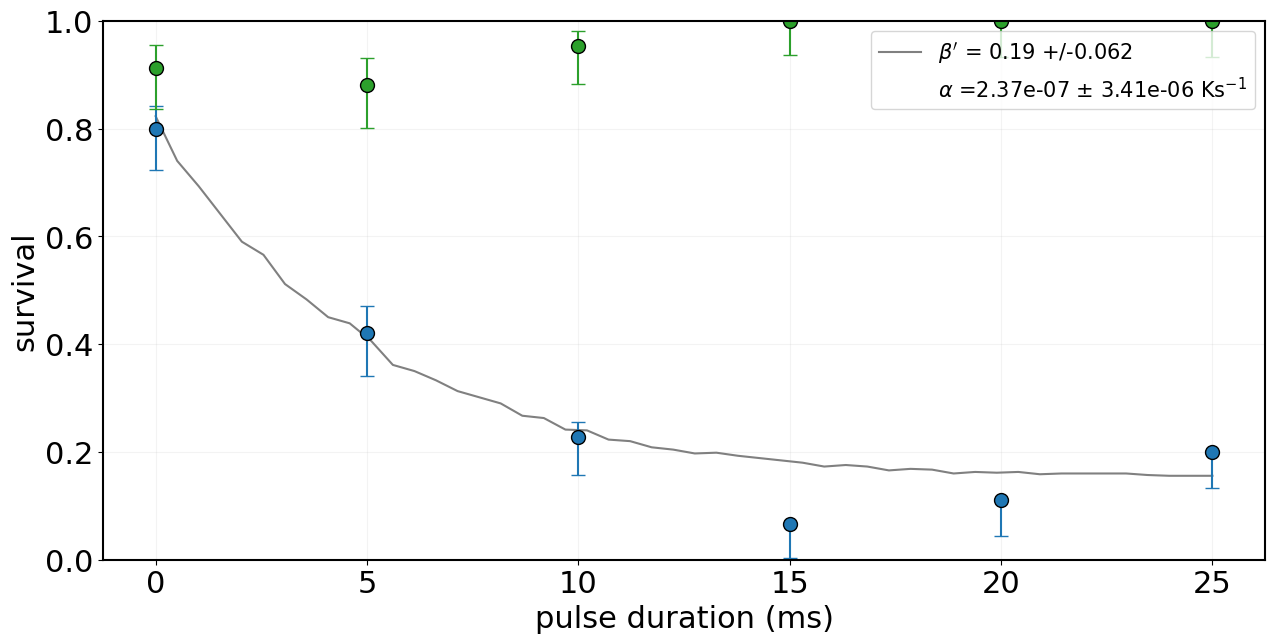

In [122]:
reloadMyModules(12)
fileId = 2
threshold = 60
x_data,load_one_y,load_one_err,load_two_y,load_two_err,surv_unc = ta.getCollisionalData(fileId, loadOneOpt,loadTwoOpt,threshold=threshold);
load_two_y[0] = 0.8
# load_two_y[1] = 0.45

# load_two_y[4] = 0.3

T0 = 50e-6
T0_unc = 1e-6
num_points = 50
alpha_guess = 1e-6
uncertainties = [surv_unc]*num_points 
alpha, decay_constant = lac.beta_fit_guess(x_data,load_one_y,load_two_y, U0, T0,alpha_guess=alpha_guess,num_points = num_points,plot_alpha=False,plot_tau=False)
_,x_fit,y_fit,decay_unc = lac.decay_fit(x_data,load_two_y,num_points = num_points,plot=False)

fig,ax = plt.subplots(1, figsize=[15,7])
beta_prime = decay_constant
total_unc = decay_unc
# beta_prime,high_err,low_err = lac.beta_prime_fit(decay_constant,alpha,uncertainties,x_fit,y_fit,range_lim=.4,range_step=0.001)
# total_unc = np.sqrt(((high_err+low_err)/2)**2 + decay_unc**2) 
ax.plot(x_fit, lac.two_body_loss_sim(x_fit,beta_prime,alpha,asymp=0.15), 
        label= f"$\\beta^{{\\prime}}$ = {beta_prime:.2f} +/-{total_unc:.3f} ",color='grey')

ax.errorbar(x_data,load_two_y, yerr=load_two_err,ls='none',ecolor=color2,marker = 'o',markersize = markersize,
            markerfacecolor=color2,markeredgecolor='k',capsize=capsize)


ax.errorbar(x_data,load_one_y, yerr=load_one_err,ls='none',ecolor=color1,marker = 'o',markersize = markersize,
            markerfacecolor=color1,markeredgecolor='k',capsize=capsize)
alpha, decay_constant = lac.beta_fit_guess(x_data,load_one_y,load_two_y, U0, T0,alpha_guess=alpha_guess,num_points = num_points,plot_tau=False)
ticks = np.arange(x_data[0], max(x_data),len(x_data))
plt.legend(loc= 'upper right', ncol = 1,prop={'size': 15})
plt.ylim(0,1)
plt.ylabel('survival')
plt.xlabel(r'pulse duration (ms)')
# plt.title(r'LGM  T=15  $  \mu K  \ \ \Delta = 150 \ \mathrm{MHz} \ \mathrm{D1}, U=10 \ \mathrm{MHz}, I=1.3I_{sat} $');
decay_constant_15uK = decay_constant
beta_15uK_LGM,beta_15uK_LGM_unc = lac.betaCalc(beta_prime,total_unc,w,w_unc,T0,T0_unc)
print('beta =',beta_15uK_LGM,'+/-',beta_15uK_LGM_unc)

beta = 3.301994997670892e-11 +/- 1.492158101938179e-11


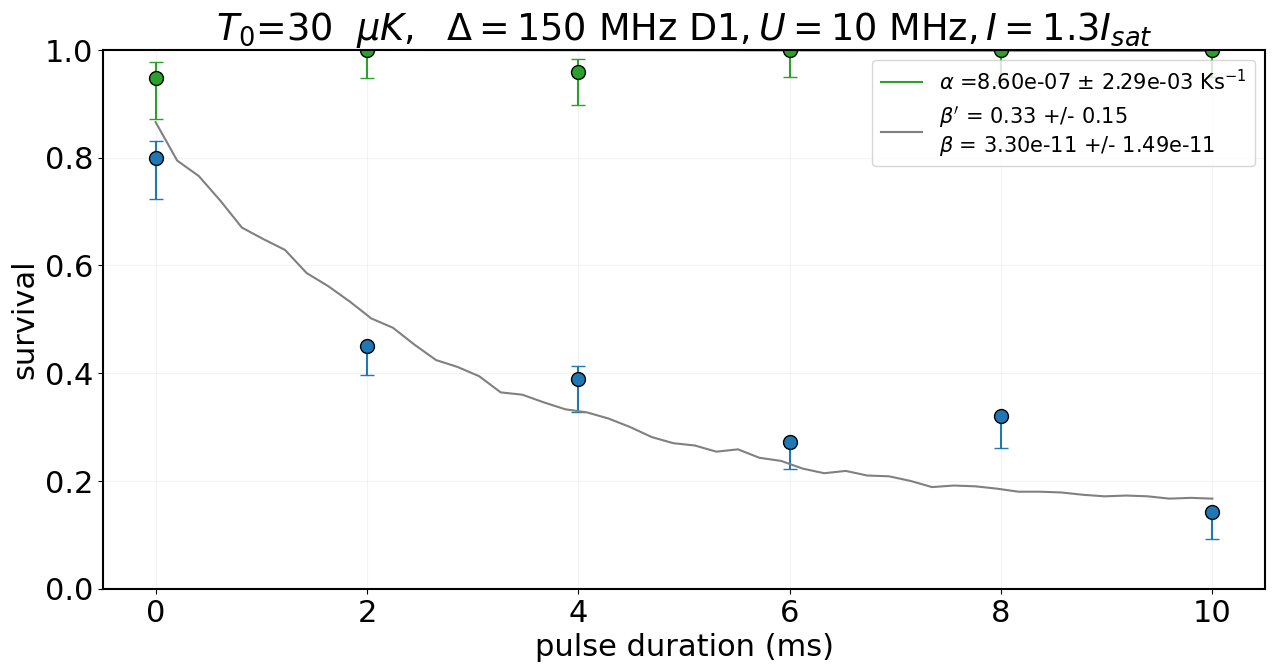

In [384]:
reloadMyModules(12)
fileId = 7
threshold = 60
x_data,load_one_y,load_one_err,load_two_y,load_two_err,surv_unc = ta.getCollisionalData(fileId, loadOneOpt,loadTwoOpt,threshold=threshold);
load_two_y[0] = 0.8

T0 = 27.5e-6
T0_unc = 1e-6
num_points = 50
alpha_guess = 1e-6
uncertainties = [surv_unc]*num_points 
alpha, decay_constant = lac.beta_fit_guess(x_data,load_one_y,load_two_y, U0, T0,alpha_guess=alpha_guess,num_points = num_points,plot_alpha=False,plot_tau=False)
_,x_fit,y_fit,decay_unc = lac.decay_fit(x_data,load_two_y,num_points = num_points,plot=False)

fig,ax = plt.subplots(1, figsize=[15,7])
beta_prime = decay_constant
total_unc = decay_unc
# beta_prime,high_err,low_err = lac.beta_prime_fit(decay_constant,alpha,uncertainties,x_fit,y_fit,range_lim=.4,range_step=0.001)
# total_unc = np.sqrt(((high_err+low_err)/2)**2 + decay_unc**2) 
ax.errorbar(x_data,load_two_y, yerr=load_two_err,ls='none',ecolor=color2,marker = 'o',markersize = markersize,
            markerfacecolor=color2,markeredgecolor='k',capsize=capsize)


ax.errorbar(x_data,load_one_y, yerr=load_one_err,ls='none',ecolor=color1,marker = 'o',markersize = markersize,
            markerfacecolor=color1,markeredgecolor='k',capsize=capsize)
alpha, decay_constant = lac.beta_fit_guess(x_data,load_one_y,load_two_y, U0, T0,alpha_guess=alpha_guess,num_points = num_points,plot_tau=False)
ticks = np.arange(x_data[0], max(x_data),len(x_data))

plt.title(r'$T_0$=30  $  \mu K , \ \ \Delta = 150 \ \mathrm{MHz} \ \mathrm{D1}, U=10 \ \mathrm{MHz}, I=1.3I_{sat} $');
decay_constant_15uK = decay_constant
beta_15uK_LGM,beta_15uK_LGM_unc = lac.betaCalc(beta_prime,total_unc,w,w_unc,T0,T0_unc)
ax.plot(x_fit, lac.two_body_loss_sim(x_fit,beta_prime,alpha,asymp=0.15), 
        label= f"$\\beta^{{\\prime}}$ = {beta_prime:.2f} +/- {total_unc:.2f}\n$\\beta$ = {beta_15uK_LGM:.2e} +/- {beta_15uK_LGM_unc:.2e}", color='grey')
plt.legend(loc= 'upper right', ncol = 1,prop={'size': 15})
plt.ylim(0,1)
plt.ylabel('survival')
plt.xlabel(r'pulse duration (ms)')
print('beta =',beta_15uK_LGM,'+/-',beta_15uK_LGM_unc)

### 55 $\mu$K

beta = 1.872855948778156e-11 +/- 8.438165543185621e-12


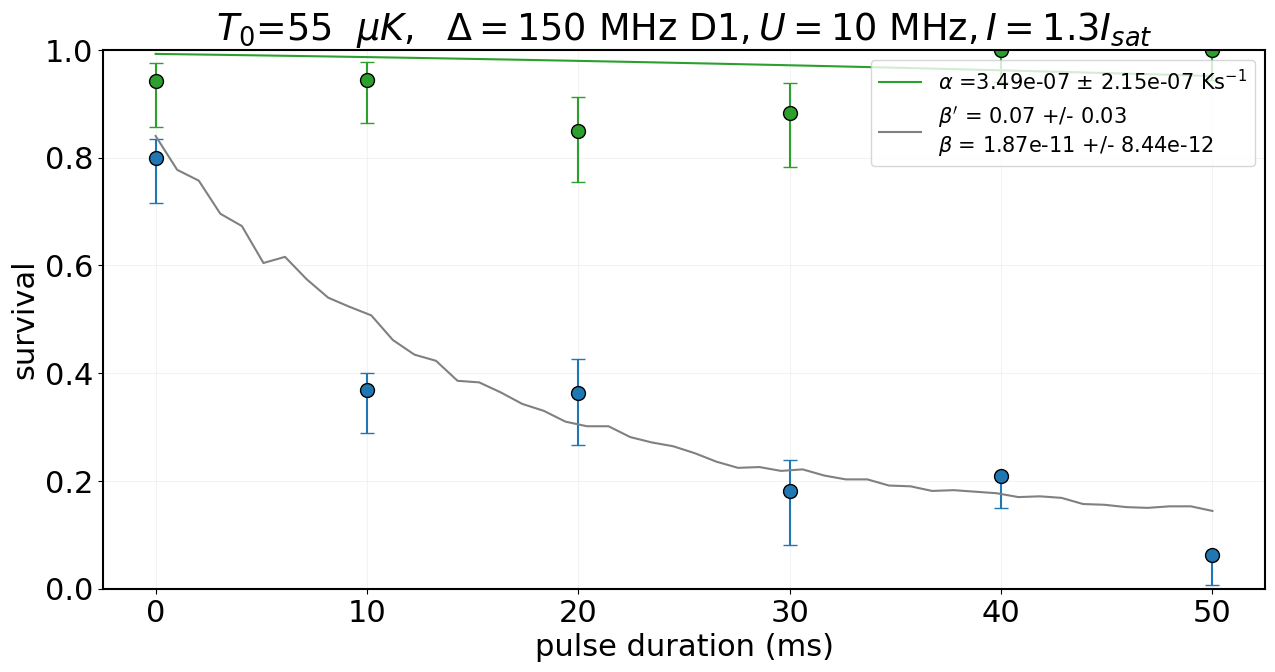

In [381]:
reloadMyModules(12)
fileId = 12
threshold = 60
x_data,load_one_y,load_one_err,load_two_y,load_two_err,surv_unc = ta.getCollisionalData(fileId, loadOneOpt,loadTwoOpt,threshold=threshold);
load_two_y[0] = 0.8

T0 = 55e-6
T0_unc = 1e-6
num_points = 50
alpha_guess = 1e-6
uncertainties = [surv_unc]*num_points 
alpha, decay_constant = lac.beta_fit_guess(x_data,load_one_y,load_two_y, U0, T0,alpha_guess=alpha_guess,num_points = num_points,plot_alpha=False,plot_tau=False)
_,x_fit,y_fit,decay_unc = lac.decay_fit(x_data,load_two_y,num_points = num_points,plot=False)

fig,ax = plt.subplots(1, figsize=[15,7])
beta_prime = decay_constant
total_unc = decay_unc
# beta_prime,high_err,low_err = lac.beta_prime_fit(decay_constant,alpha,uncertainties,x_fit,y_fit,range_lim=.4,range_step=0.001)
# total_unc = np.sqrt(((high_err+low_err)/2)**2 + decay_unc**2) 
ax.errorbar(x_data,load_two_y, yerr=load_two_err,ls='none',ecolor=color2,marker = 'o',markersize = markersize,
            markerfacecolor=color2,markeredgecolor='k',capsize=capsize)


ax.errorbar(x_data,load_one_y, yerr=load_one_err,ls='none',ecolor=color1,marker = 'o',markersize = markersize,
            markerfacecolor=color1,markeredgecolor='k',capsize=capsize)
alpha, decay_constant = lac.beta_fit_guess(x_data,load_one_y,load_two_y, U0, T0,alpha_guess=alpha_guess,num_points = num_points,plot_tau=False)
ticks = np.arange(x_data[0], max(x_data),len(x_data))

plt.title(r'$T_0$=55  $  \mu K , \ \ \Delta = 150 \ \mathrm{MHz} \ \mathrm{D1}, U=10 \ \mathrm{MHz}, I=1.3I_{sat} $');
decay_constant_15uK = decay_constant
beta_15uK_LGM,beta_15uK_LGM_unc = lac.betaCalc(beta_prime,total_unc,w,w_unc,T0,T0_unc)
ax.plot(x_fit, lac.two_body_loss_sim(x_fit,beta_prime,alpha,asymp=0.1), 
        label= f"$\\beta^{{\\prime}}$ = {beta_prime:.2f} +/- {total_unc:.2f}\n$\\beta$ = {beta_15uK_LGM:.2e} +/- {beta_15uK_LGM_unc:.2e}", color='grey')
plt.legend(loc= 'upper right', ncol = 1,prop={'size': 15})
plt.ylim(0,1)
plt.ylabel('survival')
plt.xlabel(r'pulse duration (ms)')
print('beta =',beta_15uK_LGM,'+/-',beta_15uK_LGM_unc)

### plot

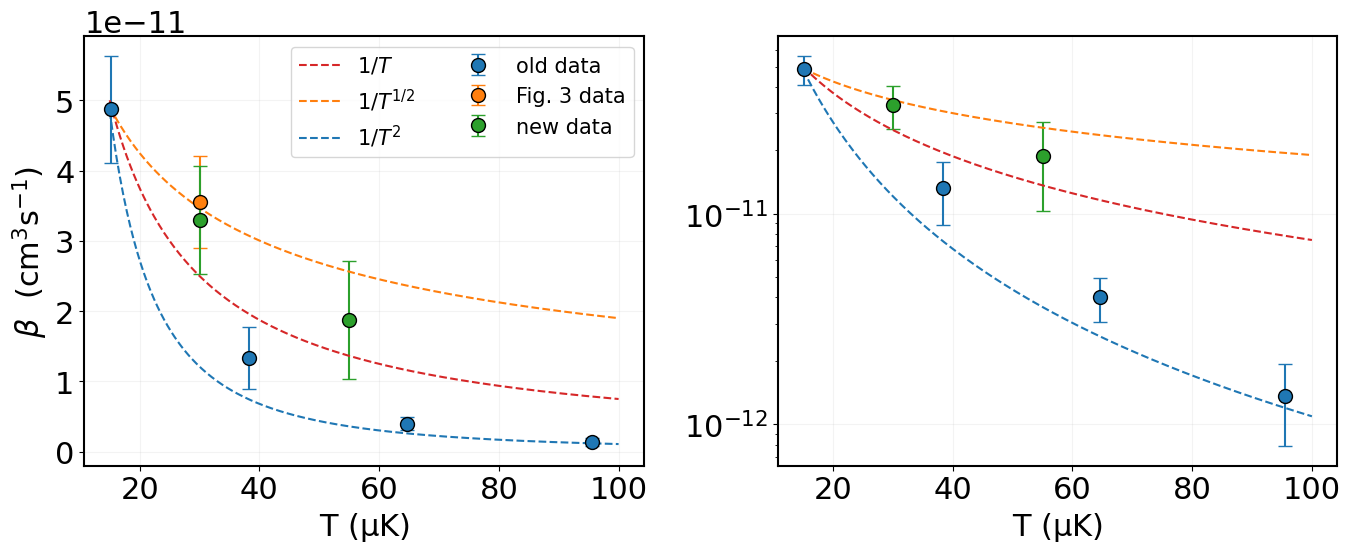

In [382]:
color3 = 'tab:orange'
temps = [15.2,38.3,64.6,95.5]
beta_D1 = [4.869952775228256e-11,1.3275367541877999e-11,4.009151198261506e-12,1.3586428313035454e-12 ]
beta_D1_unc= [7.641416608215013e-12,4.418634496320841e-12,9.43030617756738e-13,5.726737227411777e-13]

temps_new = [30,55]
temps_det = [30]
beta_D1_det = [3.5540914354759644e-11]
beta_D1_deunc = [6.5540914354759644e-12]
beta_D1_new = [3.291412731320405e-11,1.872855948778156e-11]
beta_D1_new_unc = [7.688679888501763e-12,8.438165543185621e-12]
fig, axs = plt.subplots(1, 2, figsize=(14, 6))  # Create a figure with two subplots
x = np.linspace(15,100,300)

axs[0].errorbar(temps, beta_D1, yerr=beta_D1_unc,ecolor=color2, ls='none', marker='o', markersize=10,
                markerfacecolor=color2, markeredgecolor='k', capsize=5, label= 'old data')

axs[0].errorbar(temps_det, beta_D1_det, yerr=beta_D1_deunc,ecolor=color3, ls='none', marker='o', markersize=10,
                markerfacecolor=color3, markeredgecolor='k', capsize=5, label= 'Fig. 3 data')

axs[0].errorbar(temps_new, beta_D1_new, yerr=beta_D1_new_unc,ecolor=color1, ls='none', marker='o', markersize=10,
                markerfacecolor=color1, markeredgecolor='k', capsize=5, label= 'new data')

axs[0].plot(x,1/x*7.5e-10,label = r'$1/T$',color='tab:red',linestyle = '--')
axs[0].plot(x,1/np.sqrt(x)*1.9e-10,label = r'$1/T^{1/2}$',color='tab:orange',linestyle = '--')
axs[0].plot(x,1/x**2*10.9e-9,label = r'$1/T^{2}$',color='tab:blue',linestyle = '--')

axs[0].set_ylabel(r'$ \beta \ \ \mathrm{(cm^3s^{-1})} $')
axs[0].set_xlabel(r'$\mathrm{T} \ (\mathrm{\mu K})$')
axs[0].grid(True)
axs[0].legend(ncol=2, fontsize = 15)
axs[1].errorbar(temps_new, beta_D1_new, yerr=beta_D1_new_unc,ecolor=color1, ls='none', marker='o', markersize=10,
                markerfacecolor=color1, markeredgecolor='k', capsize=5, label= ' new data')

axs[1].errorbar(temps, beta_D1, yerr=beta_D1_unc, ls='none', marker='o', markersize=10,
                markerfacecolor=color2,ecolor=color2, markeredgecolor='k', capsize=5)

axs[1].set_xlabel(r'$\mathrm{T} \ (\mathrm{\mu K})$')
axs[1].set_yscale('log')
axs[1].plot(x,1/x*7.5e-10,label = r'$1/T',color='tab:red',linestyle = '--')
axs[1].plot(x,1/np.sqrt(x)*1.9e-10,label = r'$1/T^{1/2}',color='tab:orange',linestyle = '--')
axs[1].plot(x,1/x**2*10.9e-9,label = r'$1/T^{1/2}$',color='tab:blue',linestyle = '--')

axs[1].grid(True)
# fig.legend(loc='upper center', bbox_to_anchor=(0.5, 1.02), ncol=3)

plt.tight_layout()  # Adjust layout to prevent overlapping

## $\Delta = 80$ MHz

### 30 $\mu$K

beta = 7.405632197346619e-11 +/- 5.148919420681071e-11


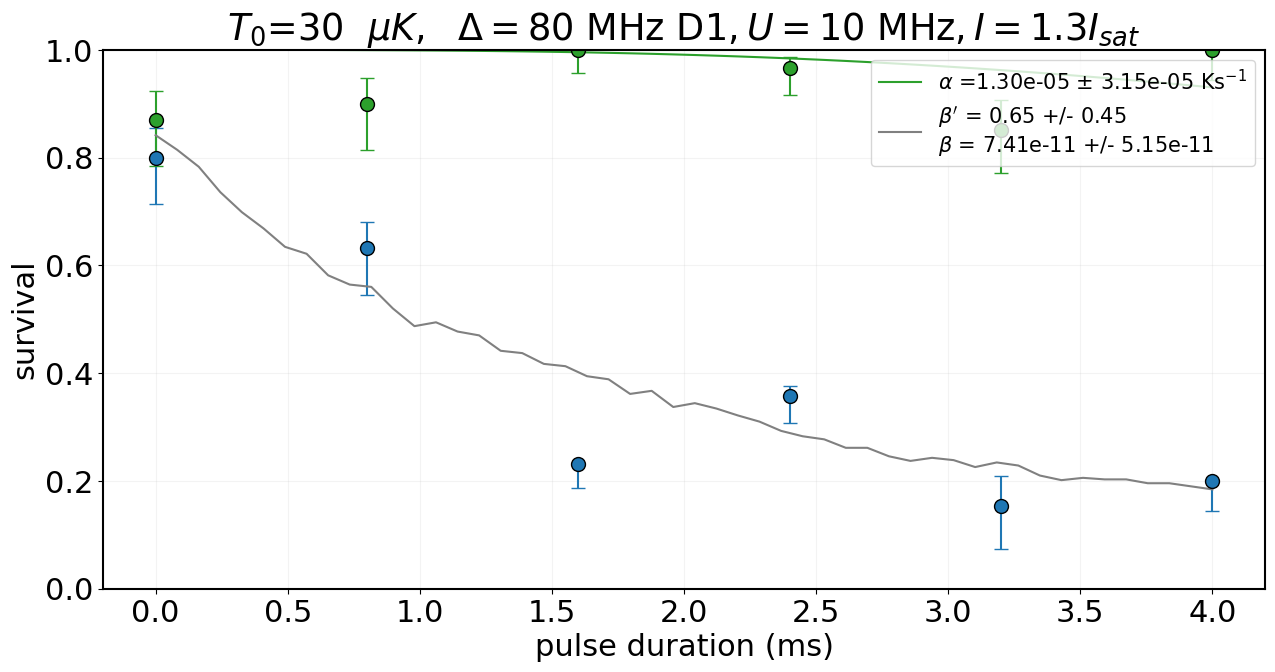

In [401]:
reloadMyModules(12)
fileId = 20

threshold = 80
x_data,load_one_y,load_one_err,load_two_y,load_two_err,surv_unc = ta.getCollisionalData(fileId, loadOneOpt,loadTwoOpt,threshold=threshold);
load_two_y[0] = 0.8


T0 = 30e-6
T0_unc = 1e-6
num_points = 50
alpha_guess = 1e-6
uncertainties = [surv_unc]*num_points 
alpha, decay_constant = lac.beta_fit_guess(x_data,load_one_y,load_two_y, U0, T0,alpha_guess=alpha_guess,num_points = num_points,plot_alpha=False,plot_tau=False)
_,x_fit,y_fit,decay_unc = lac.decay_fit(x_data,load_two_y,num_points = num_points,plot=False)

fig,ax = plt.subplots(1, figsize=[15,7])
beta_prime = decay_constant
total_unc = decay_unc
# beta_prime,high_err,low_err = lac.beta_prime_fit(decay_constant,alpha,uncertainties,x_fit,y_fit,range_lim=.4,range_step=0.001)
# total_unc = np.sqrt(((high_err+low_err)/2)**2 + decay_unc**2) 
ax.errorbar(x_data,load_two_y, yerr=load_two_err,ls='none',ecolor=color2,marker = 'o',markersize = markersize,
            markerfacecolor=color2,markeredgecolor='k',capsize=capsize)


ax.errorbar(x_data,load_one_y, yerr=load_one_err,ls='none',ecolor=color1,marker = 'o',markersize = markersize,
            markerfacecolor=color1,markeredgecolor='k',capsize=capsize)
alpha, decay_constant = lac.beta_fit_guess(x_data,load_one_y,load_two_y, U0, T0,alpha_guess=alpha_guess,num_points = num_points,plot_tau=False)
ticks = np.arange(x_data[0], max(x_data),len(x_data))

plt.title(r'$T_0$=30  $  \mu K , \ \ \Delta = 80 \ \mathrm{MHz} \ \mathrm{D1}, U=10 \ \mathrm{MHz}, I=1.3I_{sat} $');
decay_constant_15uK = decay_constant
beta_15uK_LGM,beta_15uK_LGM_unc = lac.betaCalc(beta_prime,total_unc,w,w_unc,T0,T0_unc)
ax.plot(x_fit, lac.two_body_loss_sim(x_fit,beta_prime,alpha,asymp=0.15), 
        label= f"$\\beta^{{\\prime}}$ = {beta_prime:.2f} +/- {total_unc:.2f}\n$\\beta$ = {beta_15uK_LGM:.2e} +/- {beta_15uK_LGM_unc:.2e}", color='grey')
plt.legend(loc= 'upper right', ncol = 1,prop={'size': 15})
plt.ylim(0,1)
plt.ylabel('survival')
plt.xlabel(r'pulse duration (ms)')
print('beta =',beta_15uK_LGM,'+/-',beta_15uK_LGM_unc)

### 55 $\mu$K

beta = 5.944251104025545e-11 +/- 8.93073635370173e-12


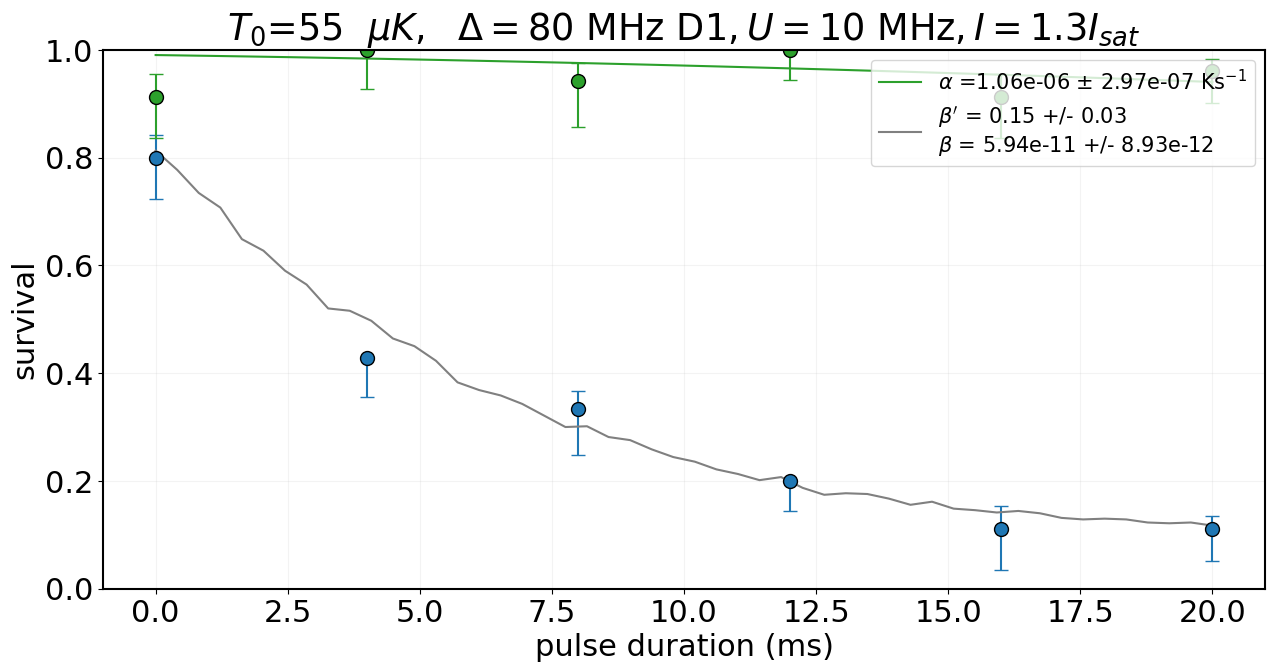

In [397]:
reloadMyModules(12)
fileId = 16
threshold = 60
x_data,load_one_y,load_one_err,load_two_y,load_two_err,surv_unc = ta.getCollisionalData(fileId, loadOneOpt,loadTwoOpt,threshold=threshold);
load_two_y[0] = 0.8
load_two_y[3] = 0.2

T0 = 57e-6
T0_unc = 1e-6
num_points = 50
alpha_guess = 1e-6
uncertainties = [surv_unc]*num_points 
alpha, decay_constant = lac.beta_fit_guess(x_data,load_one_y,load_two_y, U0, T0,alpha_guess=alpha_guess,num_points = num_points,plot_alpha=False,plot_tau=False)
_,x_fit,y_fit,decay_unc = lac.decay_fit(x_data,load_two_y,num_points = num_points,plot=False)

fig,ax = plt.subplots(1, figsize=[15,7])
beta_prime = decay_constant
total_unc = decay_unc
# beta_prime,high_err,low_err = lac.beta_prime_fit(decay_constant,alpha,uncertainties,x_fit,y_fit,range_lim=.4,range_step=0.001)
# total_unc = np.sqrt(((high_err+low_err)/2)**2 + decay_unc**2) 
ax.errorbar(x_data,load_two_y, yerr=load_two_err,ls='none',ecolor=color2,marker = 'o',markersize = markersize,
            markerfacecolor=color2,markeredgecolor='k',capsize=capsize)


ax.errorbar(x_data,load_one_y, yerr=load_one_err,ls='none',ecolor=color1,marker = 'o',markersize = markersize,
            markerfacecolor=color1,markeredgecolor='k',capsize=capsize)
alpha, decay_constant = lac.beta_fit_guess(x_data,load_one_y,load_two_y, U0, T0,alpha_guess=alpha_guess,num_points = num_points,plot_tau=False)
ticks = np.arange(x_data[0], max(x_data),len(x_data))

plt.title(r'$T_0$=55  $  \mu K , \ \ \Delta = 80 \ \mathrm{MHz} \ \mathrm{D1}, U=10 \ \mathrm{MHz}, I=1.3I_{sat} $');
decay_constant_15uK = decay_constant
beta_15uK_LGM,beta_15uK_LGM_unc = lac.betaCalc(.2,total_unc,w,w_unc,T0,T0_unc)
ax.plot(x_fit, lac.two_body_loss_sim(x_fit,beta_prime,alpha,asymp=0.1), 
        label= f"$\\beta^{{\\prime}}$ = {beta_prime:.2f} +/- {total_unc:.2f}\n$\\beta$ = {beta_15uK_LGM:.2e} +/- {beta_15uK_LGM_unc:.2e}", color='grey')
plt.legend(loc= 'upper right', ncol = 1,prop={'size': 15})
plt.ylim(0,1)
plt.ylabel('survival')
plt.xlabel(r'pulse duration (ms)')
print('beta =',beta_15uK_LGM,'+/-',beta_15uK_LGM_unc)

### plot

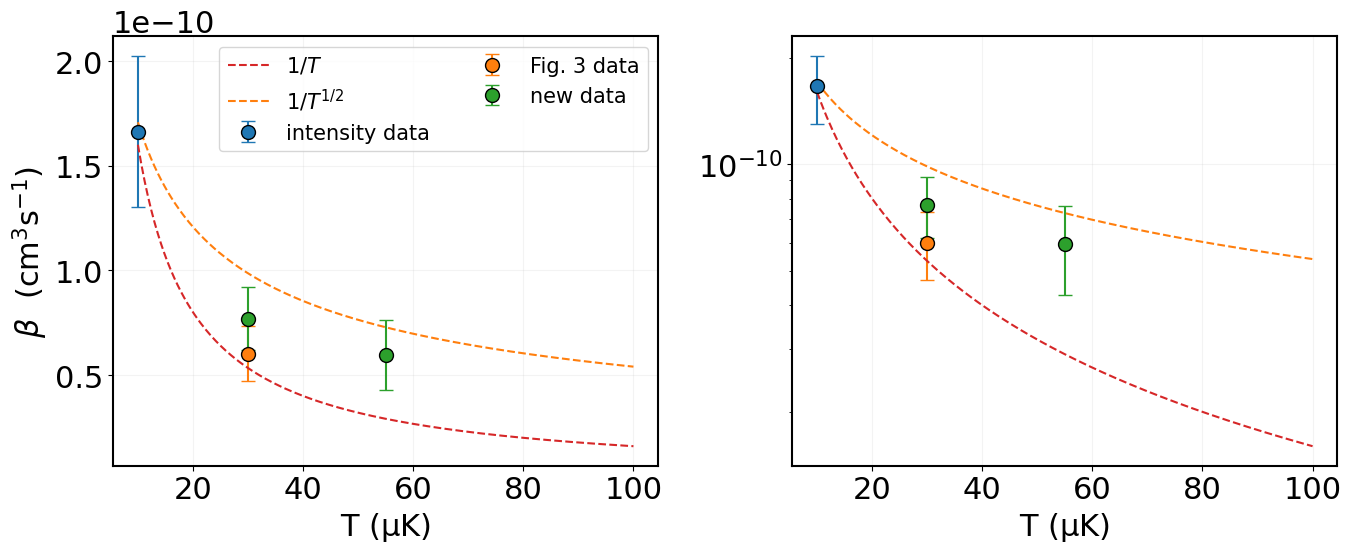

In [398]:
color3 = 'tab:orange'
temp_int = [10]
beta_D1_int = [1.663157963310821e-10]
beta_D1_int_unc = [ 3.6242699673354626e-11]

temps_new = [30,55]
temps_det = [30]
beta_D1_det = [6.012210901888907e-11]
beta_D1_deunc = [1.3077145237783975e-11]
beta_D1_new = [7.697715578669269e-11,5.944251104025545e-11]
beta_D1_new_unc = [1.504797776269923e-11,1.6636941777529263e-11]
fig, axs = plt.subplots(1, 2, figsize=(14, 6))  # Create a figure with two subplots
x = np.linspace(10,100,300)

axs[0].errorbar(temp_int, beta_D1_int, yerr=beta_D1_int_unc,ecolor=color2, ls='none', marker='o', markersize=10,
                markerfacecolor=color2, markeredgecolor='k', capsize=5, label= 'intensity data')

axs[0].errorbar(temps_det, beta_D1_det, yerr=beta_D1_deunc,ecolor=color3, ls='none', marker='o', markersize=10,
                markerfacecolor=color3, markeredgecolor='k', capsize=5, label= 'Fig. 3 data')

axs[0].errorbar(temps_new, beta_D1_new, yerr=beta_D1_new_unc,ecolor=color1, ls='none', marker='o', markersize=10,
                markerfacecolor=color1, markeredgecolor='k', capsize=5, label= 'new data')

axs[0].plot(x,1/x*16e-10,label = r'$1/T$',color='tab:red',linestyle = '--')
axs[0].plot(x,1/np.sqrt(x)*5.4e-10,label = r'$1/T^{1/2}$',color='tab:orange',linestyle = '--')
# axs[0].plot(x*1e-6,1/x**2*10.9e-9,label = r'$1/T^{2}$',color='tab:blue',linestyle = '--')

axs[0].set_ylabel(r'$ \beta \ \ \mathrm{(cm^3s^{-1})} $')
axs[0].set_xlabel(r'$\mathrm{T} \ (\mathrm{\mu K})$')
axs[0].grid(True)
axs[0].legend(ncol=2, fontsize = 15)
axs[1].errorbar(temp_int, beta_D1_int, yerr=beta_D1_int_unc,ecolor=color2, ls='none', marker='o', markersize=10,
                markerfacecolor=color2, markeredgecolor='k', capsize=5, label= 'intensity plot data')
axs[1].errorbar(temps_det, beta_D1_det, yerr=beta_D1_deunc,ecolor=color3, ls='none', marker='o', markersize=10,
                markerfacecolor=color3, markeredgecolor='k', capsize=5, label= 'Fig. 3 data')
axs[1].errorbar(temps_new, beta_D1_new, yerr=beta_D1_new_unc,ecolor=color1, ls='none', marker='o', markersize=10,
                markerfacecolor=color1, markeredgecolor='k', capsize=5, label= 'new data')

axs[1].set_xlabel(r'$\mathrm{T} \ (\mathrm{\mu K})$')
axs[1].set_yscale('log')
axs[1].plot(x,1/x*16e-10,label = r'$1/T$',color='tab:red',linestyle = '--')
axs[1].plot(x,1/np.sqrt(x)*5.4e-10,label = r'$1/T^{1/2}',color='tab:orange',linestyle = '--')

axs[1].grid(True)
# fig.legend(loc='upper center', bbox_to_anchor=(0.5, 1.02), ncol=3)

plt.tight_layout()  # Adjust layout to prevent overlapping